In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 경기도 여주시,「여주시복지실태조사」, 2022, 2024.11.07, 아동·청소년 시설 만족도_지역아동센터 

In [3]:
df_sat = pd.read_csv('아동·청소년_시설_만족도_지역아동센터_20241116172344.csv')

In [4]:
df_sat = df_sat.T
df_sat = df_sat.replace('특성별(2)','특성')
df_sat = df_sat.set_index(0)
df_sat = df_sat.drop('특성별(1)',axis=0)
df_sat = df_sat.replace('소계','전체')
df_sat = df_sat.rename(columns=df_sat.iloc[0])
df_sat.rename(columns={0: '특성'}, inplace=True)
df_sat = df_sat.drop('특성',axis=0)
df_sat.index = df_sat.index.set_names('만족도')

In [5]:
df_sat

,전체,남자,여자,30 ~ 39세이하,40 ~ 49세이하,한국인,고졸,대졸이상,단독주택,아파트,...,중장년가구,1000만원미만,1000~3000만원미만,3000~5000만원미만,동부,읍면부,1분위,3분위,4분위,5분위
만족도,,,,,,,,,,,,,,,,,,,,,
매우 불만족 (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
약간 불만족 (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
보통 (%),47.5,27.3,63.1,100,18.4,47.5,52.9,45.9,0,100,...,40.4,100,63.1,0,82.2,0,100,77.6,0,0
약간 만족 (%),42.3,72.7,18.7,0,65.6,42.3,47.1,40.9,80.5,0,...,47.9,0,18.7,100,0,100,0,0,100,100
매우 만족 (%),10.3,0,18.2,0,15.9,10.3,0,13.2,19.5,0,...,11.6,0,18.2,0,17.8,0,0,22.4,0,0
평균[5점] (점),3.63,3.73,3.55,3,3.97,3.63,3.47,3.67,4.2,3,...,3.71,3,3.55,4,3.36,4,3,3.45,4,4


In [6]:
df_sat_score = df_sat.loc['평균[5점] (점)']
df_sat = df_sat.drop('평균[5점] (점)',axis=0)

In [7]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 매우 불만족 (%) to 매우 만족 (%)
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   전체             5 non-null      object
 1   남자             5 non-null      object
 2   여자             5 non-null      object
 3   30 ~ 39세이하     5 non-null      object
 4   40 ~ 49세이하     5 non-null      object
 5   한국인            5 non-null      object
 6   고졸             5 non-null      object
 7   대졸이상           5 non-null      object
 8   단독주택           5 non-null      object
 9   아파트            5 non-null      object
 10  2인가구           5 non-null      object
 11  3인가구           5 non-null      object
 12  4인이상가구         5 non-null      object
 13  영유아가구          5 non-null      object
 14  아동가구           5 non-null      object
 15  청년가구           5 non-null      object
 16  중장년가구          5 non-null      object
 17  1000만원미만       5 non-null      object
 18  1000~3000만원미만  5 non-n

In [8]:
df_sat = df_sat.astype(float)

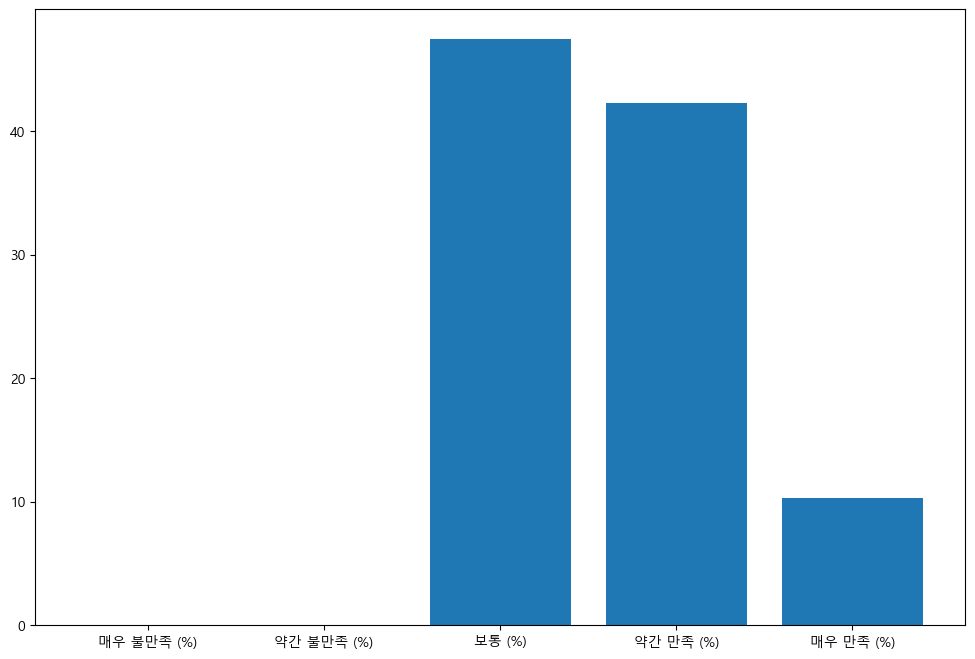

In [9]:
plt.figure(figsize=(12,8))
plt.bar(df_sat.index,df_sat['전체'])
plt.show()

## 전체

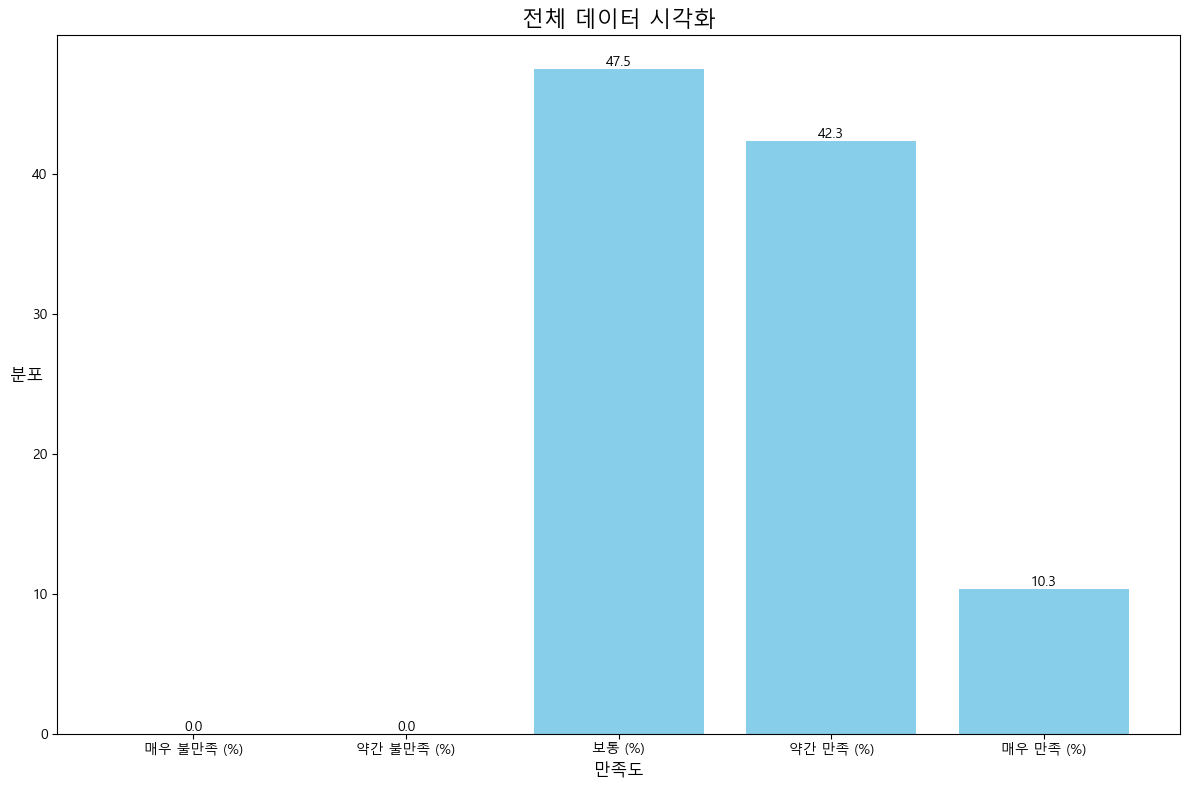

In [10]:
# 전체 확인
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sat.index, df_sat['전체'], color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('전체 데이터 시각화', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0) 
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 성별

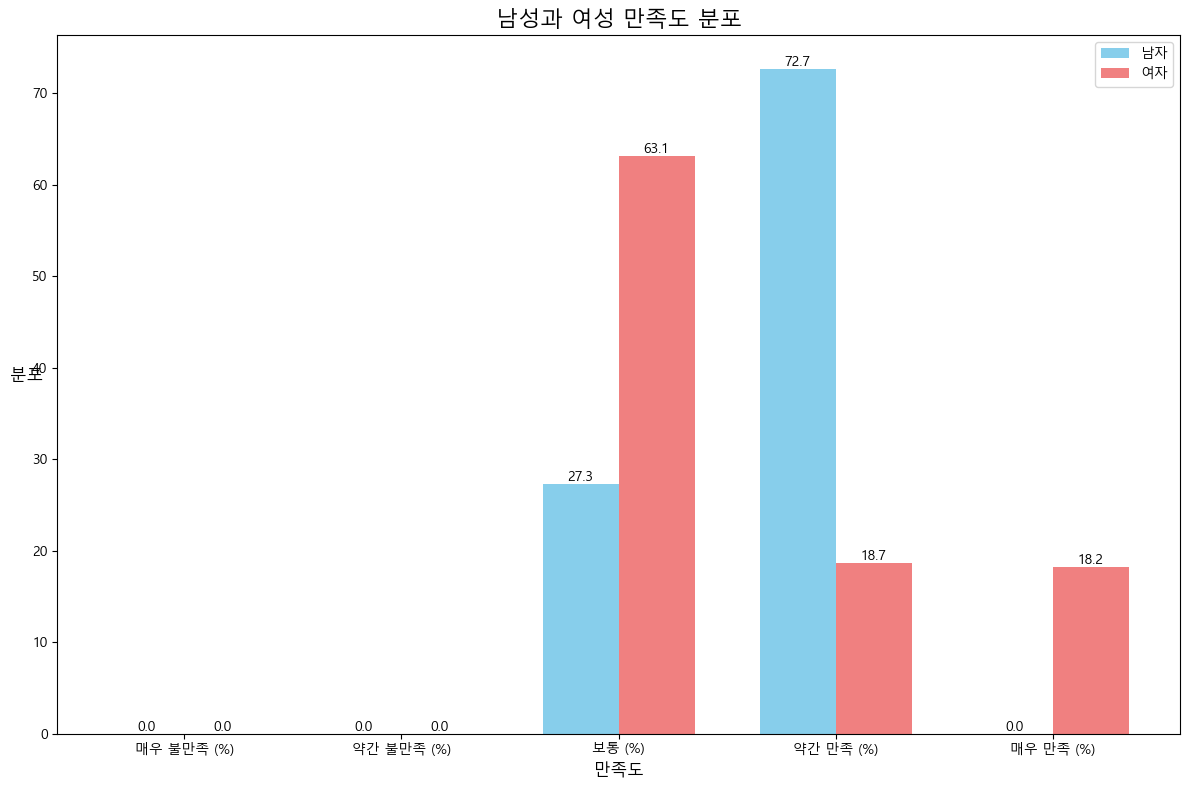

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_sat.index))  # x축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(12, 8))

# 남성과 여성 막대 생성
bars_m = plt.bar(x - width/2, df_sat['남자'], width, label='남자', color='skyblue')
bars_f = plt.bar(x + width/2, df_sat['여자'], width, label='여자', color='lightcoral')

# 각 막대 위에 값 표시
for bar in bars_m:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_f:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('남성과 여성 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 연령별

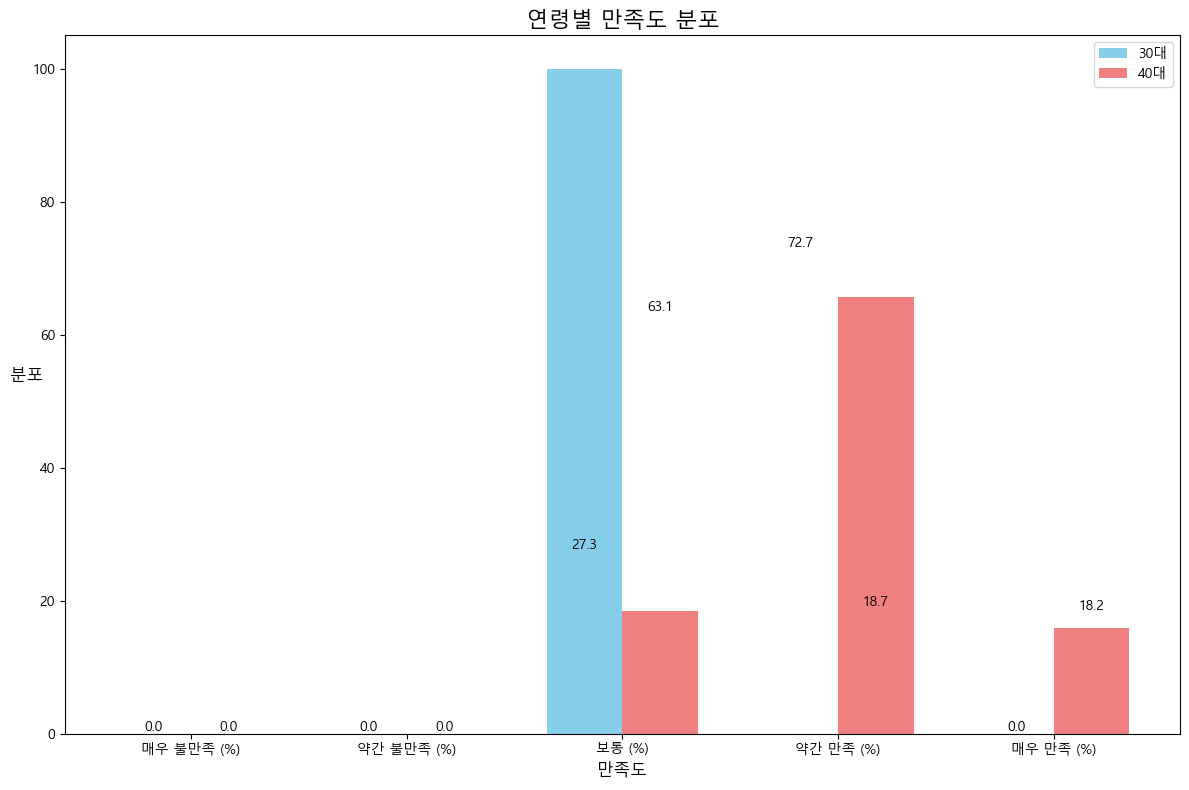

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_sat.index))  # x축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(12, 8))

# 30대 ,40대 막대 생성
bars_3 = plt.bar(x - width/2, df_sat['30 ~ 39세이하'], width, label='30대', color='skyblue')
bars_4 = plt.bar(x + width/2, df_sat['40 ~ 49세이하'], width, label='40대', color='lightcoral')

# 각 막대 위에 값 표시
for bar in bars_m:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_f:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('연령별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 교육정도별

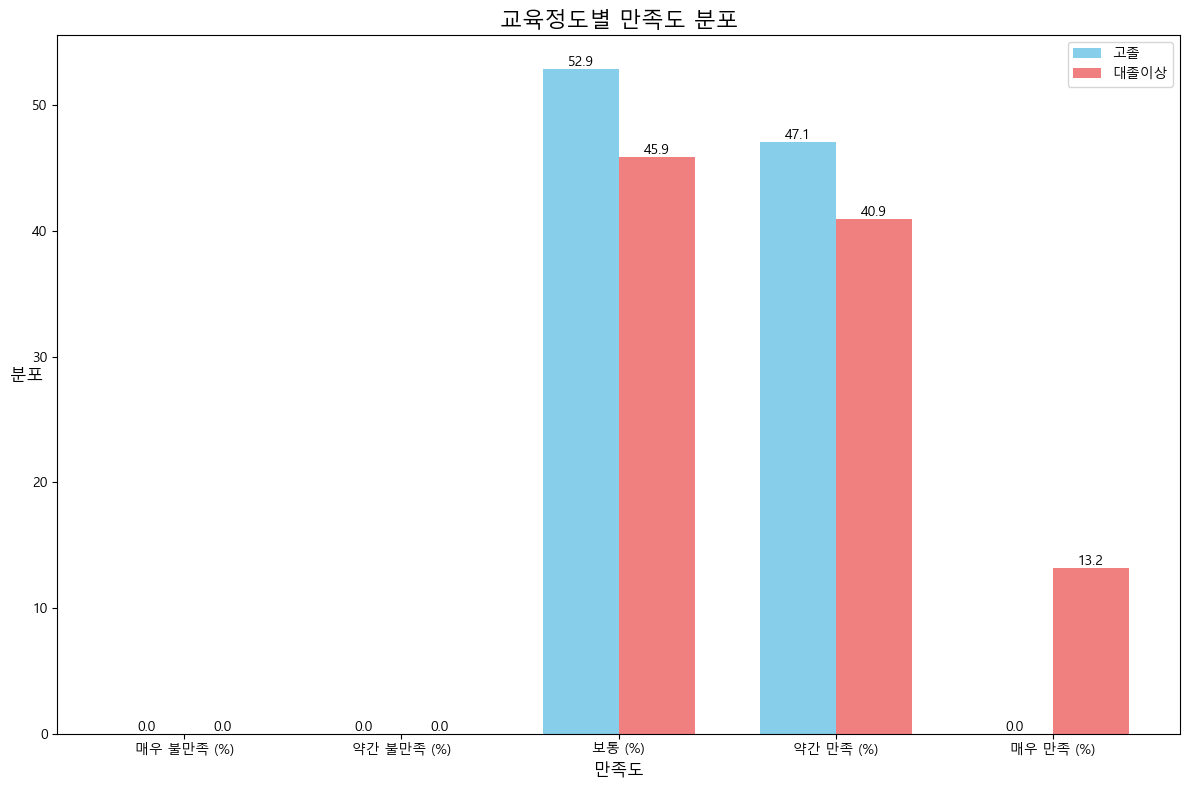

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_sat.index))  # x축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(12, 8))

# 남성과 여성 막대 생성
bars_m = plt.bar(x - width/2, df_sat['고졸'], width, label='고졸', color='skyblue')
bars_f = plt.bar(x + width/2, df_sat['대졸이상'], width, label='대졸이상', color='lightcoral')

# 각 막대 위에 값 표시
for bar in bars_m:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_f:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('교육정도별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 거처종류별

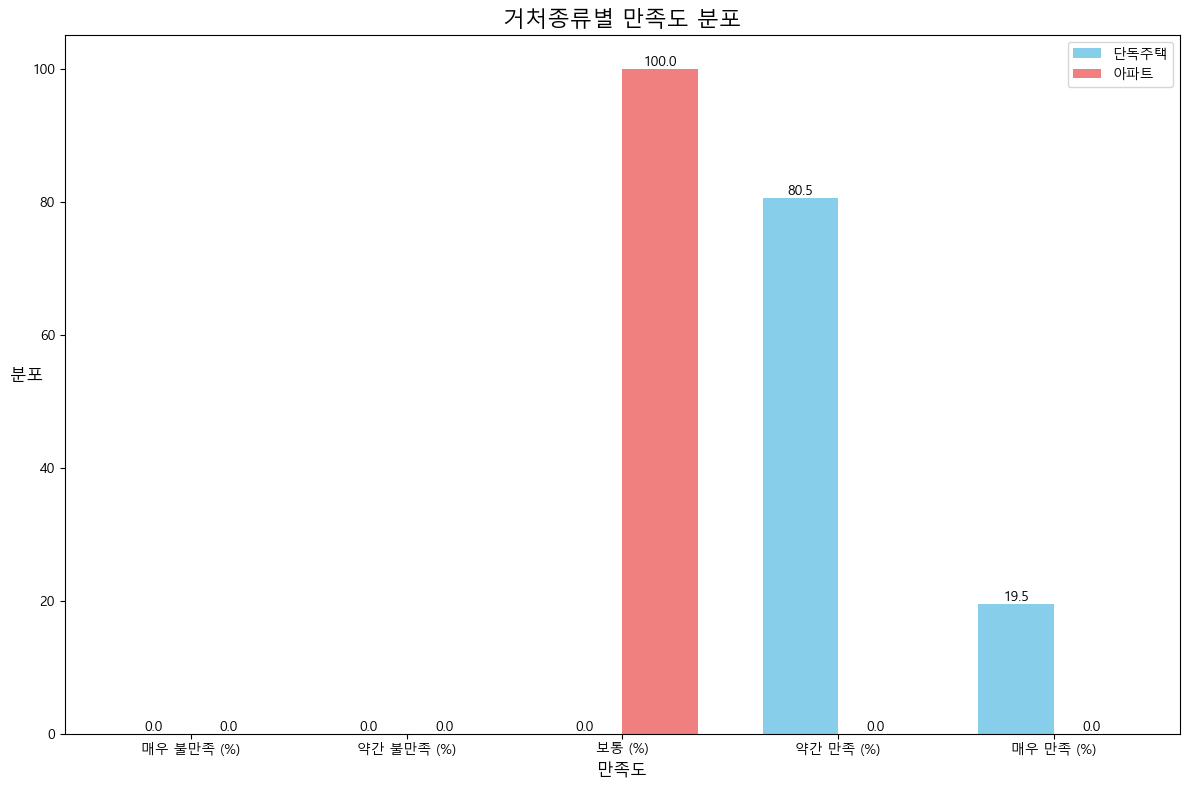

In [14]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(12, 8))

# 남성과 여성 막대 생성
bars_m = plt.bar(x - width/2, df_sat['단독주택'], width, label='단독주택', color='skyblue')
bars_f = plt.bar(x + width/2, df_sat['아파트'], width, label='아파트', color='lightcoral')

# 각 막대 위에 값 표시
for bar in bars_m:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_f:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('거처종류별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 가구원수별

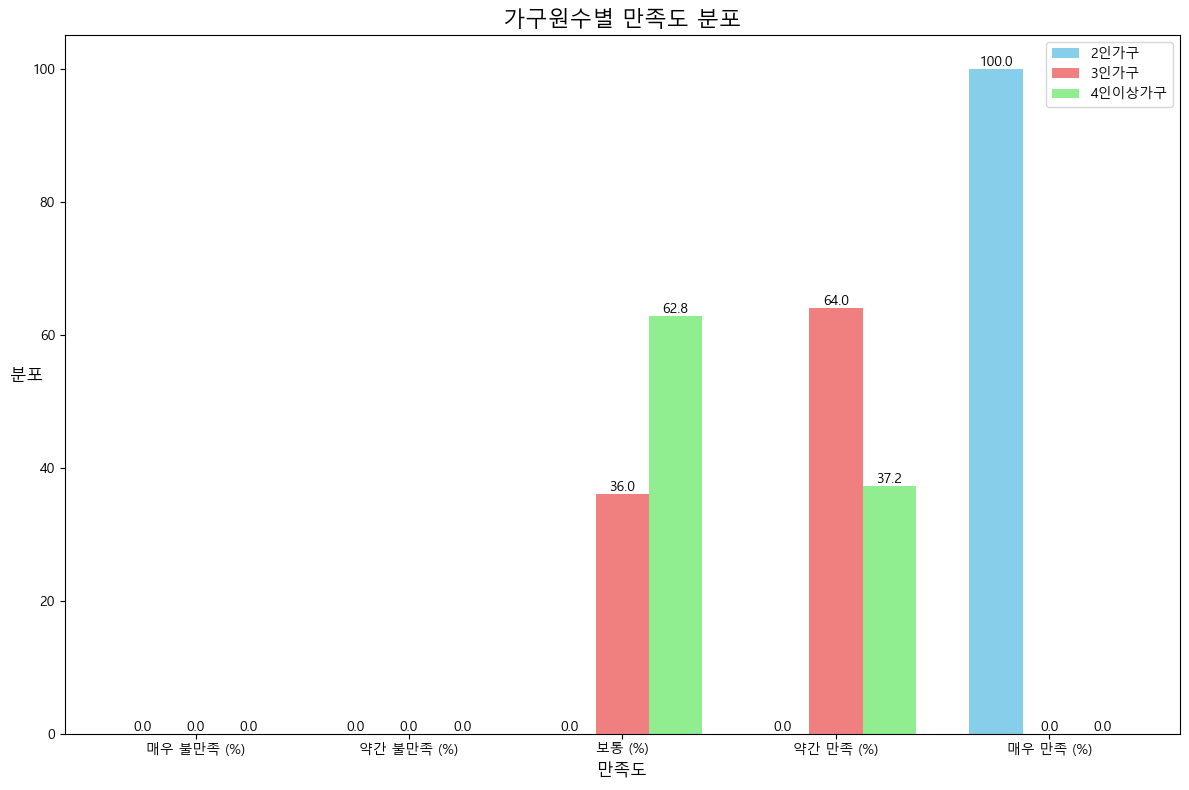

In [15]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.25  # 막대 너비 (더 좁게 설정)

plt.figure(figsize=(12, 8))

# 2인가구, 3인가구, 4인이상가구 막대 생성
bars_2 = plt.bar(x - width, df_sat['2인가구'], width, label='2인가구', color='skyblue')
bars_3 = plt.bar(x, df_sat['3인가구'], width, label='3인가구', color='lightcoral')
bars_4 = plt.bar(x + width, df_sat['4인이상가구'], width, label='4인이상가구', color='lightgreen')

# 각 막대 위에 값 표시
for bar in bars_2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('가구원수별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 가구유형별

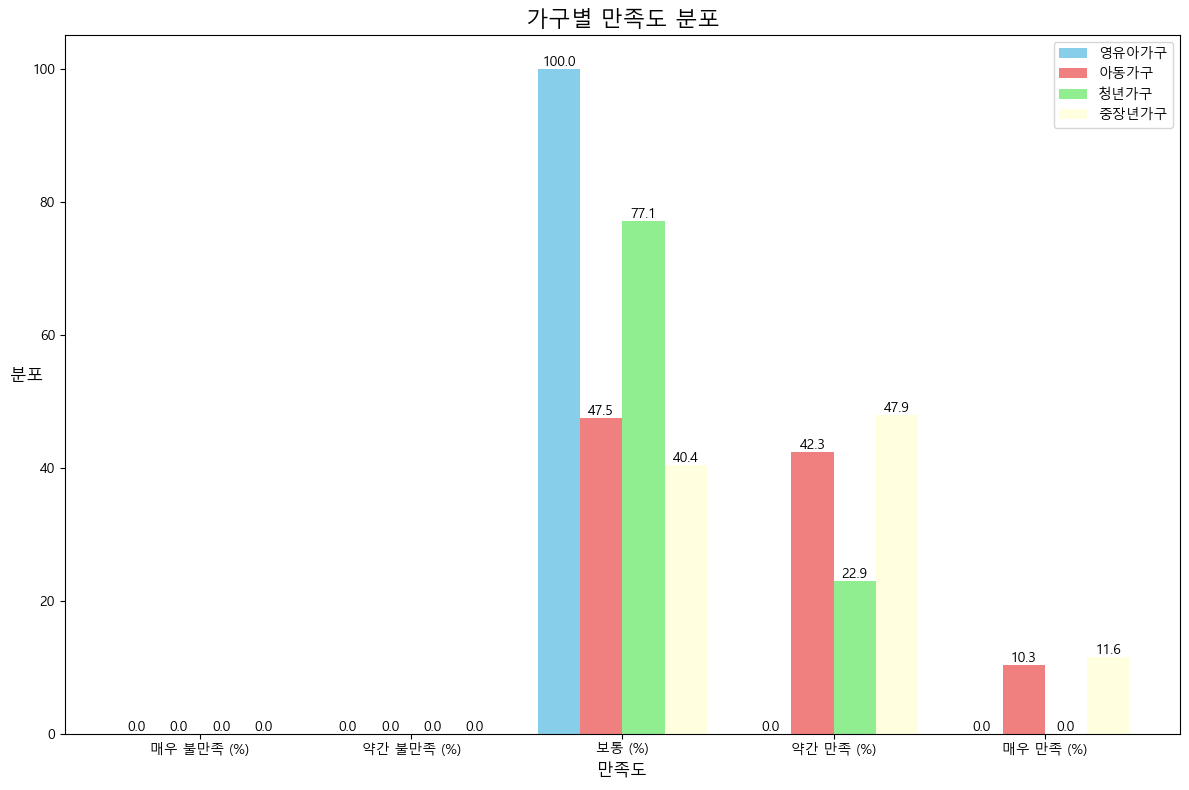

In [16]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.2  # 막대 너비 (적절히 설정)

plt.figure(figsize=(12, 8))

# 영유아가구, 아동가구, 청년가구, 중장년가구 막대 생성
bars_b = plt.bar(x - 1.5 * width, df_sat['영유아가구'], width, label='영유아가구', color='skyblue')
bars_c = plt.bar(x - 0.5 * width, df_sat['아동가구'], width, label='아동가구', color='lightcoral')
bars_y = plt.bar(x + 0.5 * width, df_sat['청년가구'], width, label='청년가구', color='lightgreen')
bars_s = plt.bar(x + 1.5 * width, df_sat['중장년가구'], width, label='중장년가구', color='lightyellow')

# 각 막대 위에 값 표시
for bar in bars_b:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_c:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_y:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_s:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('가구별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 가구소득별

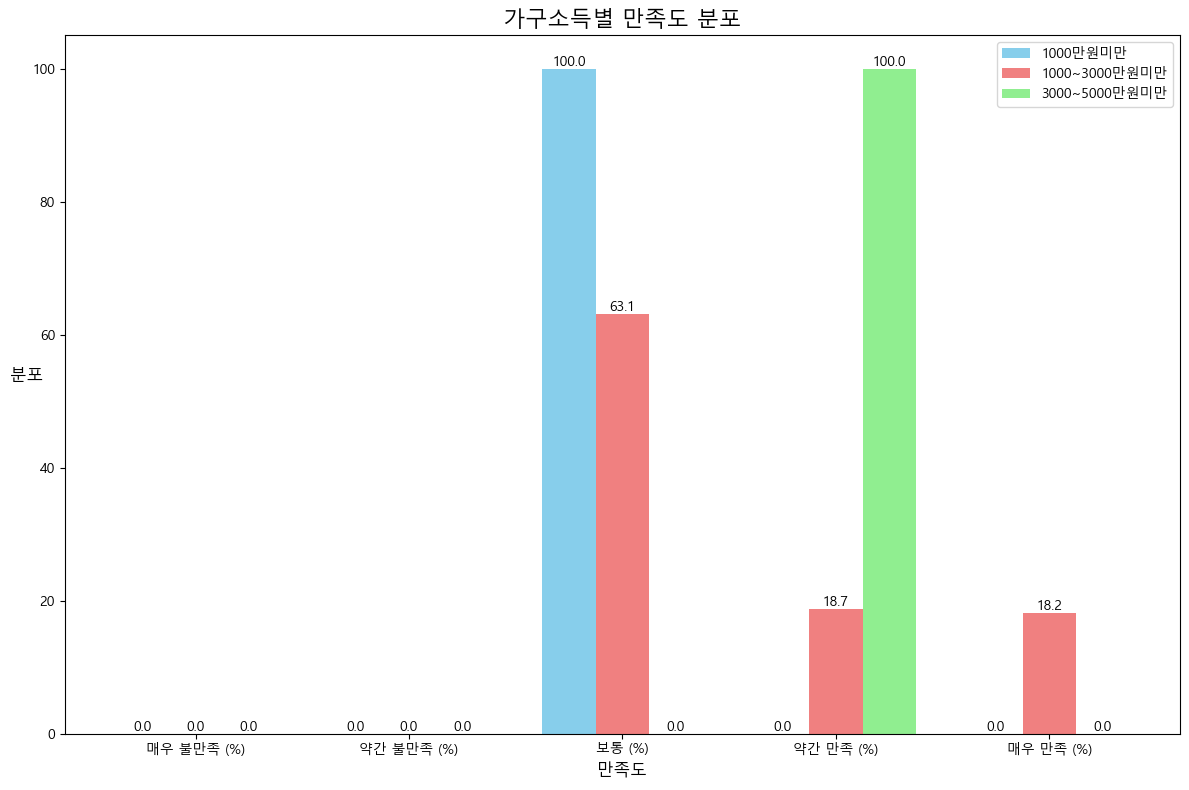

In [17]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.25  # 막대 너비 (더 좁게 설정)

plt.figure(figsize=(12, 8))

# 2인가구, 3인가구, 4인이상가구 막대 생성
bars_2 = plt.bar(x - width, df_sat['1000만원미만'], width, label='1000만원미만', color='skyblue')
bars_3 = plt.bar(x, df_sat['1000~3000만원미만'], width, label='1000~3000만원미만', color='lightcoral')
bars_4 = plt.bar(x + width, df_sat['3000~5000만원미만'], width, label='3000~5000만원미만', color='lightgreen')

# 각 막대 위에 값 표시
for bar in bars_2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('가구소득별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 생활권별

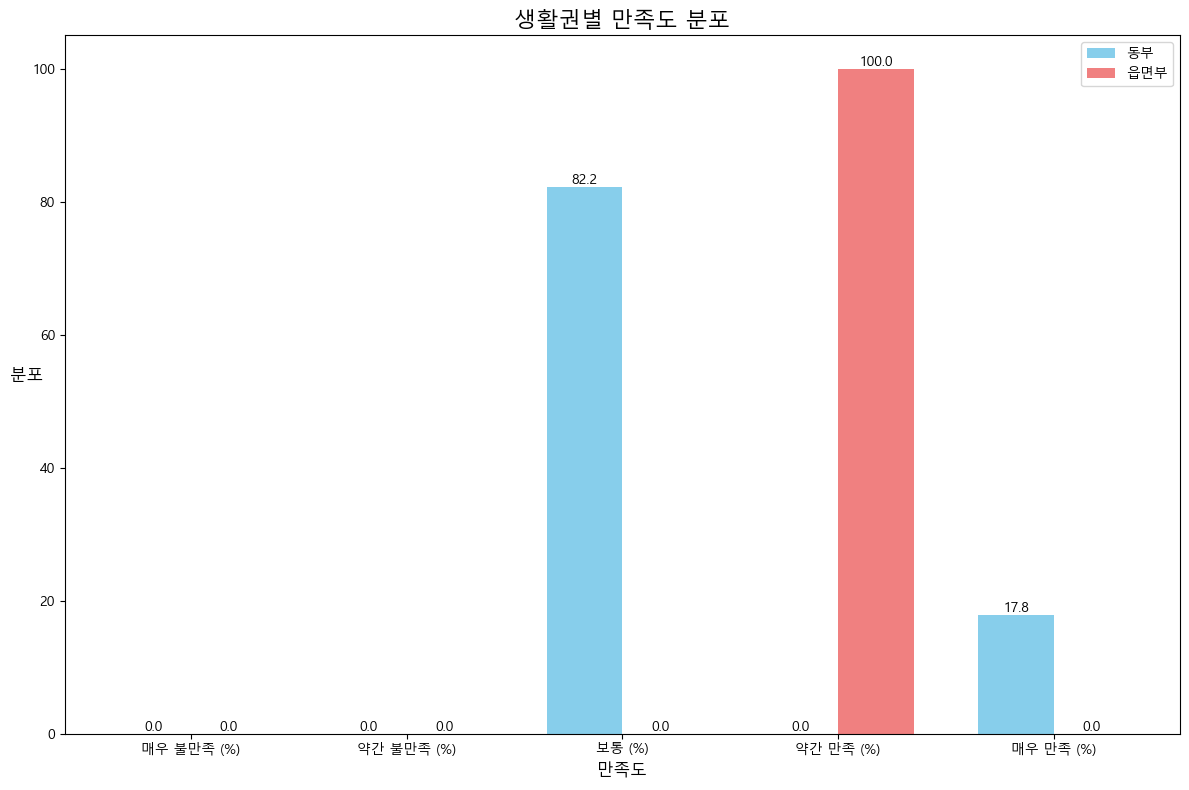

In [18]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(12, 8))

# 남성과 여성 막대 생성
bars_m = plt.bar(x - width/2, df_sat['동부'], width, label='동부', color='skyblue')
bars_f = plt.bar(x + width/2, df_sat['읍면부'], width, label='읍면부', color='lightcoral')

# 각 막대 위에 값 표시
for bar in bars_m:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars_f:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('생활권별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


## 소득분위별

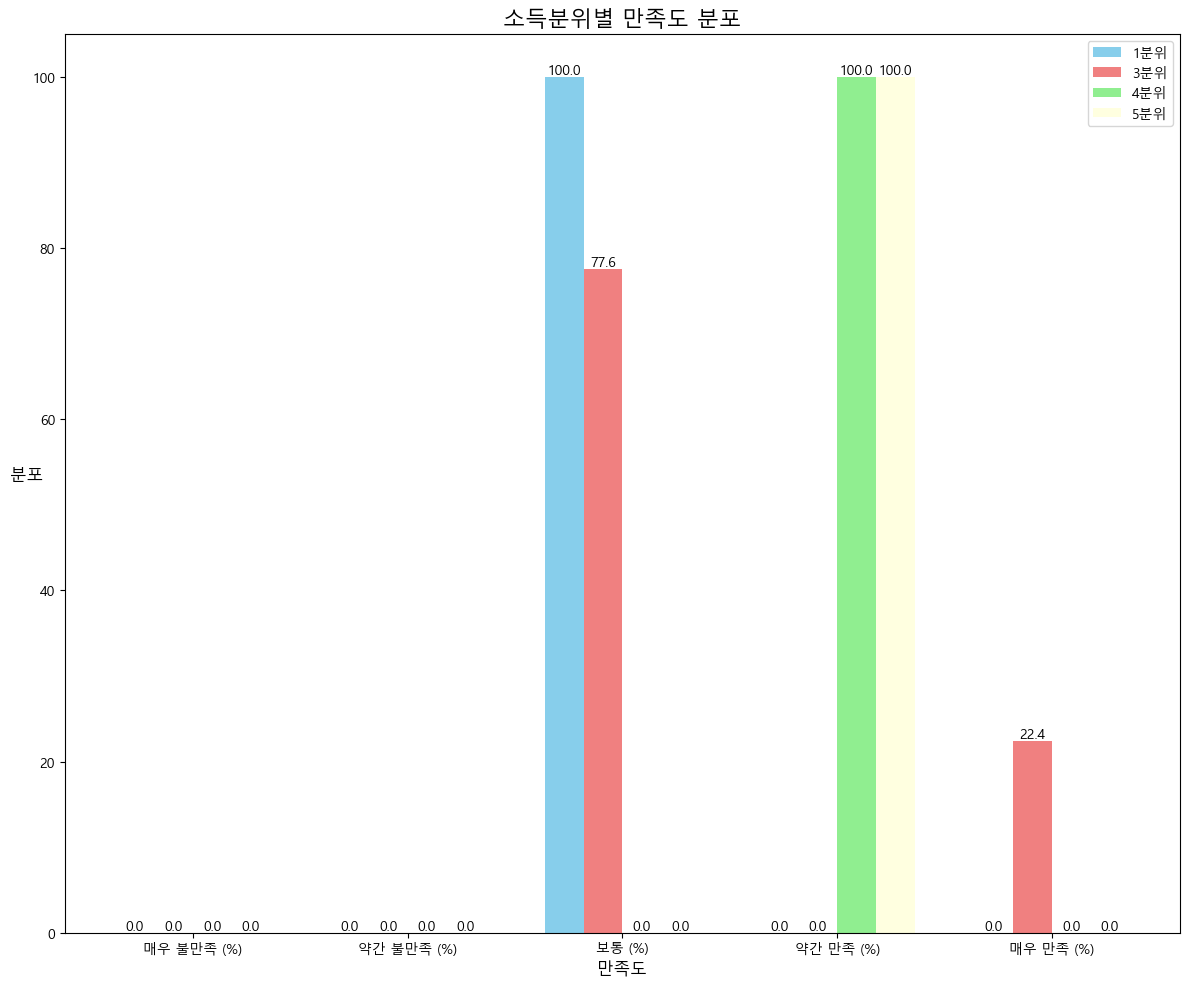

In [19]:
x = np.arange(len(df_sat.index))  # x축 위치
width = 0.18 # 막대 너비 (너무 좁지 않게 설정)

plt.figure(figsize=(12, 10))

# 1분위, 3분위, 4분위, 5분위 막대 생성
bars_1 = plt.bar(x - 1.5 * width, df_sat['1분위'], width, label='1분위', color='skyblue')
bars_3 = plt.bar(x - 0.5 * width, df_sat['3분위'], width, label='3분위', color='lightcoral')
bars_4 = plt.bar(x + 0.5 * width, df_sat['4분위'], width, label='4분위', color='lightgreen')
bars_5 = plt.bar(x + 1.5 * width, df_sat['5분위'], width, label='5분위', color='lightyellow')

# 각 막대 위에 값 표시 (0도 표시)
for bar in bars_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}' if yval > 0 else '0.0',
             ha='center', va='bottom', fontsize=10)

for bar in bars_3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}' if yval > 0 else '0.0',
             ha='center', va='bottom', fontsize=10)

for bar in bars_4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}' if yval > 0 else '0.0',
             ha='center', va='bottom', fontsize=10)

for bar in bars_5:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}' if yval > 0 else '0.0',
             ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.title('소득분위별 만족도 분포', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(x, df_sat.index)  # x축 레이블 설정
plt.legend()  # 범례 추가
plt.tight_layout()  # 그래프 간격 조정
plt.show()


# 강원특별자치도,「강원도사회보장수급대상통계」, 2020, 2024.11.07, 지역아동센터 이용 아동 현황

In [20]:
df_use = pd.read_csv('지역아동센터_이용_아동_현황_20241116172758.csv')

In [21]:
df_use = df_use.T

In [22]:
df_use

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
특성별(1),특성별(1),전국,강원도,지역별,지역별,시군별,시군별,시군별,시군별,시군별,...,시군별,시군별,시군별,시군별,시군별,시군별,시군별,시군별,시군별,시군별
특성별(2),특성별(2),소계,소계,시지역,군지역,춘천시,원주시,강릉시,동해시,태백시,...,횡성군,영월군,평창군,정선군,철원군,화천군,양구군,인제군,고성군,양양군
2020,계,110321,4577,3239,1338,769,653,621,398,322,...,96,379,62,276,81,57,24,46,93,125
2020.1,교육급여대상가정,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2020.2,한부모가정,10591,409,331,78,48,87,77,34,36,...,9,16,*,19,5,*,-,*,11,5
2020.3,다문화가정,14527,563,333,230,76,65,55,27,36,...,16,60,7,53,16,21,5,8,13,18
2020.4,장애가정,2005,85,67,18,11,14,16,11,9,...,-,*,*,5,-,*,-,-,*,*
2020.5,조손가정,1140,70,44,26,5,7,*,9,6,...,*,5,-,6,*,-,-,*,5,-
2020.6,다자녀가정,6299,137,31,106,11,*,*,*,6,...,18,*,*,48,16,-,*,-,16,*
2020.7,맞벌이가정,6999,168,48,120,9,*,6,9,10,...,15,6,6,63,*,*,-,-,17,*


In [23]:
df_use = pd.read_csv('지역아동센터_이용_아동_현황_20241116172758.csv')
df_use = df_use.T
df_use = df_use.replace('특성별(2)','특성')
df_use = df_use.drop('특성별(1)',axis=0)
df_use = df_use.set_index(0)
df_use = df_use.T
df_use.loc[1, '특성'] = '전국'
df_use.loc[2, '특성'] = '강원도'
df_use = df_use.rename(columns=df_sat.iloc[0])
df_use = df_use.set_index('특성')
df_use.index = df_use.index.set_names('특성')
df_use

,계,교육급여대상가정,한부모가정,다문화가정,장애가정,조손가정,다자녀가정,맞벌이가정,예외규정아동(돌봄특례),시구청장승인아동,기타
특성,,,,,,,,,,,
전국,110321,-,10591,14527,2005,1140,6299,6999,12952,873,54935
강원도,4577,-,409,563,85,70,137,168,548,28,2569
시지역,3239,-,331,333,67,44,31,48,382,22,1981
군지역,1338,-,78,230,18,26,106,120,166,6,588
춘천시,769,-,48,76,11,5,11,9,50,5,554
원주시,653,-,87,65,14,7,*,*,34,*,436
강릉시,621,-,77,55,16,*,*,6,190,8,264
동해시,398,-,34,27,11,9,*,9,20,-,286
태백시,322,-,36,36,9,6,6,10,29,5,185


In [24]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 전국 to 양양군
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   계             22 non-null     object
 1   교육급여대상가정      22 non-null     object
 2   한부모가정         22 non-null     object
 3   다문화가정         22 non-null     object
 4   장애가정          22 non-null     object
 5   조손가정          22 non-null     object
 6   다자녀가정         22 non-null     object
 7   맞벌이가정         22 non-null     object
 8   예외규정아동(돌봄특례)  22 non-null     object
 9   시구청장승인아동      22 non-null     object
 10  기타            22 non-null     object
dtypes: object(11)
memory usage: 2.1+ KB


In [25]:
df_use = df_use.replace('*','-')
df_use = df_use.replace('-','0')

In [26]:
df_use = df_use.astype(int)

In [27]:
df_use_total = df_use['계']
df_use_total

특성
전국     110321
강원도      4577
시지역      3239
군지역      1338
춘천시       769
원주시       653
강릉시       621
동해시       398
태백시       322
속초시       137
삼척시       339
홍천군        99
횡성군        96
영월군       379
평창군        62
정선군       276
철원군        81
화천군        57
양구군        24
인제군        46
고성군        93
양양군       125
Name: 계, dtype: int32

In [28]:
df_use = df_use.drop(['계','교육급여대상가정'],axis=1)

In [29]:
df_use

,한부모가정,다문화가정,장애가정,조손가정,다자녀가정,맞벌이가정,예외규정아동(돌봄특례),시구청장승인아동,기타
특성,,,,,,,,,
전국,10591,14527,2005,1140,6299,6999,12952,873,54935
강원도,409,563,85,70,137,168,548,28,2569
시지역,331,333,67,44,31,48,382,22,1981
군지역,78,230,18,26,106,120,166,6,588
춘천시,48,76,11,5,11,9,50,5,554
원주시,87,65,14,7,0,0,34,0,436
강릉시,77,55,16,0,0,6,190,8,264
동해시,34,27,11,9,0,9,20,0,286
태백시,36,36,9,6,6,10,29,5,185


In [30]:
df_use.describe()

,한부모가정,다문화가정,장애가정,조손가정,다자녀가정,맞벌이가정,예외규정아동(돌봄특례),시구청장승인아동,기타
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,536.818182,737.090909,101.863636,60.772727,304.318182,340.227273,663.000000,43.045455,2847.363636
std,2248.099232,3082.893846,425.641622,241.654206,1339.408234,1487.875793,2748.208871,185.521524,11652.015610
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,5.000000,13.750000,0.000000,0.000000,0.000000,0.000000,10.250000,0.000000,34.750000
50%,17.500000,31.500000,0.000000,5.000000,3.000000,7.500000,25.500000,0.000000,124.500000
75%,69.750000,64.000000,13.250000,8.500000,17.500000,16.500000,50.750000,5.000000,398.500000
max,10591.000000,14527.000000,2005.000000,1140.000000,6299.000000,6999.000000,12952.000000,873.000000,54935.000000


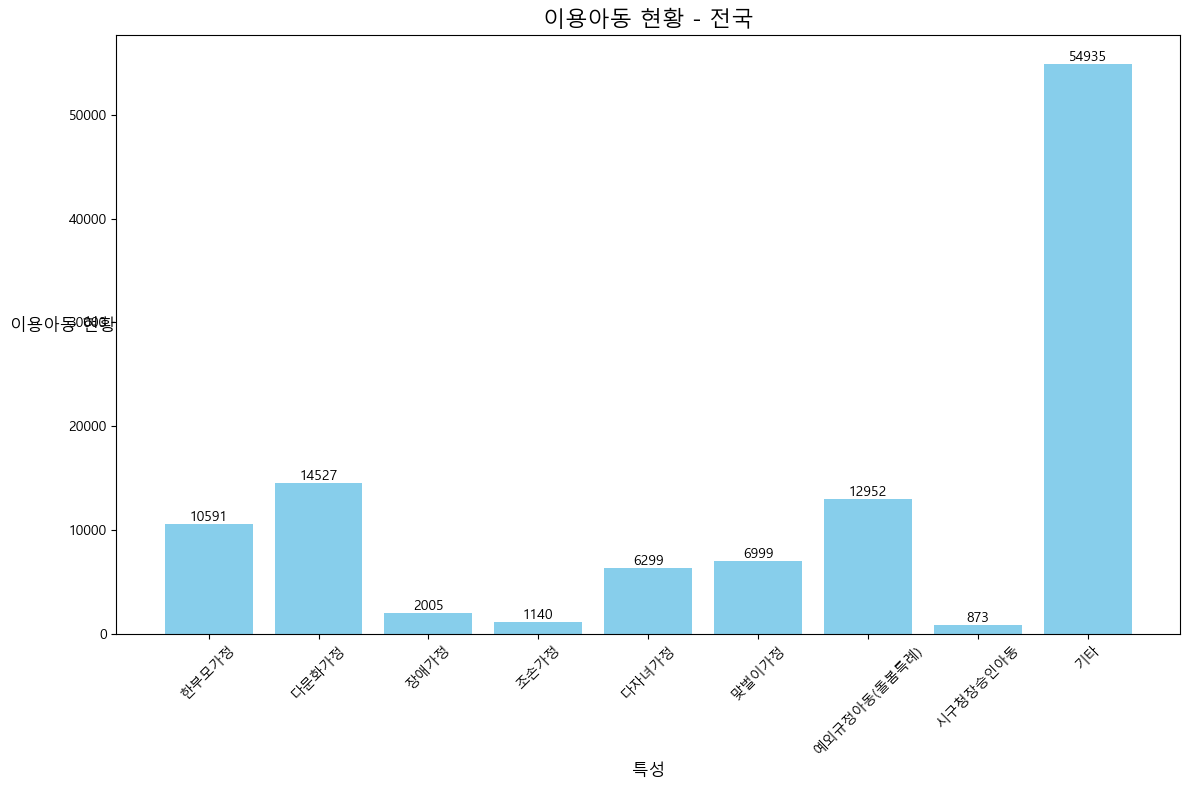

In [31]:
# 전체 확인
plt.figure(figsize=(12, 8))
bars = plt.bar(df_use.columns,  df_use.loc['전국'], color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:}', ha='center', va='bottom', fontsize=10)

plt.title('이용아동 현황 - 전국', fontsize=16)
plt.xlabel('특성', fontsize=12)
plt.ylabel('이용아동 현황', fontsize=12, rotation=0) 
plt.xticks(rotation=45)
plt.tight_layout()  # 그래프 간격 조정
plt.show()


- 기타: 기초생활수급자, 차상위계층, 전국평균가구소득 70% 이하, 일반아동, 분류없음 포함

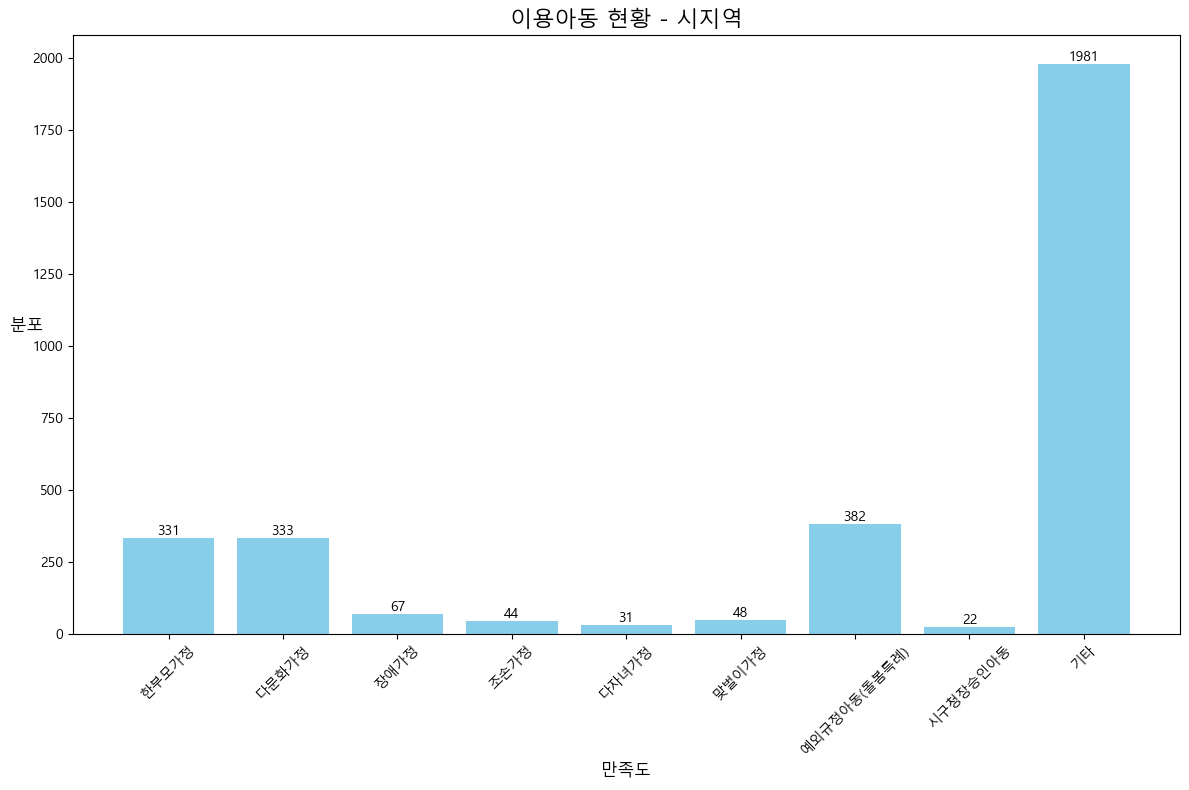

In [32]:
# 전체 확인
plt.figure(figsize=(12, 8))
bars = plt.bar(df_use.columns,  df_use.loc['시지역'], color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:}', ha='center', va='bottom', fontsize=10)

plt.title('이용아동 현황 - 시지역', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()  # 그래프 간격 조정
plt.show()


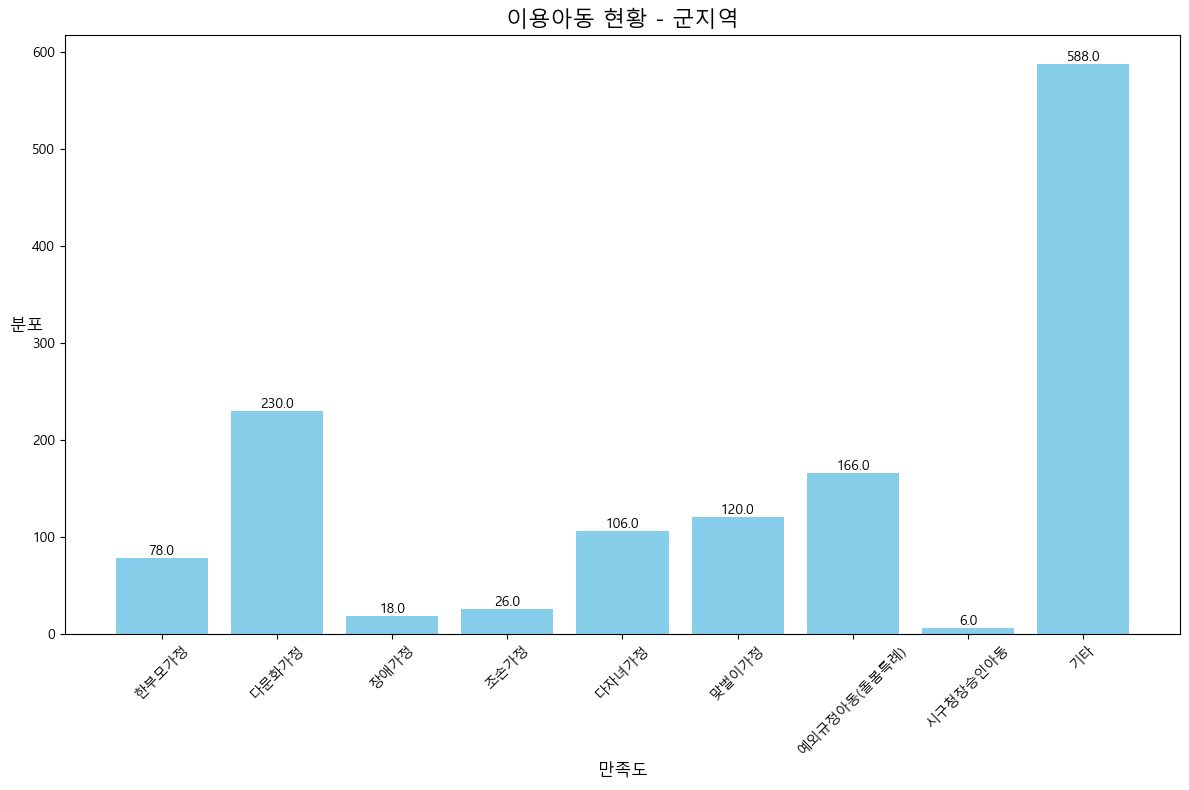

In [33]:
# 전체 확인
plt.figure(figsize=(12, 8))
bars = plt.bar(df_use.columns,  df_use.loc['군지역'], color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('이용아동 현황 - 군지역', fontsize=16)
plt.xlabel('만족도', fontsize=12)
plt.ylabel('분포', fontsize=12, rotation=0) 
plt.xticks(rotation=45)
plt.tight_layout()  # 그래프 간격 조정
plt.show()


In [34]:
def draw(col):
    # 전체 확인
    plt.figure(figsize=(12, 8))
    bars = plt.bar(df_use.columns,  df_use.loc[col], color='skyblue')
    
    # 각 막대 위에 값 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:}', ha='center', va='bottom', fontsize=10)
    
    plt.title(f'이용아동 현황 - {col}', fontsize=16)
    plt.xlabel('특성', fontsize=12)
    plt.ylabel('분포', fontsize=12, rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()


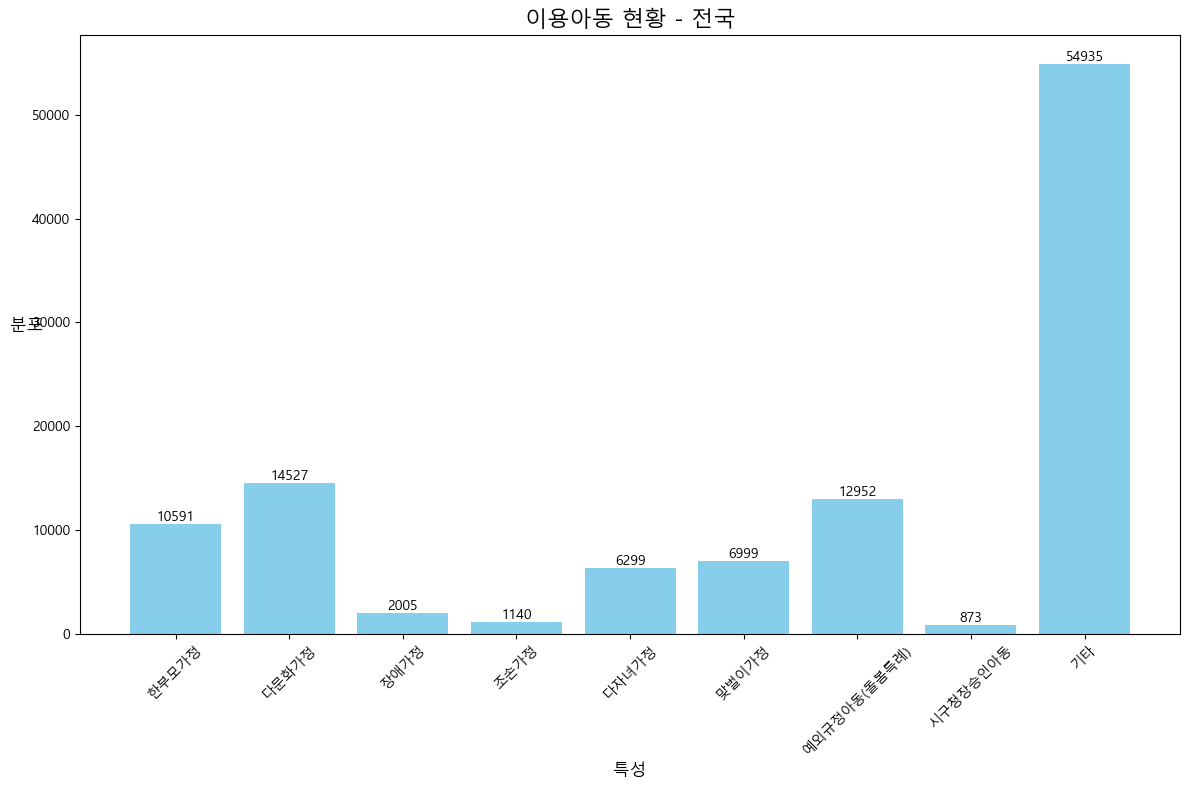

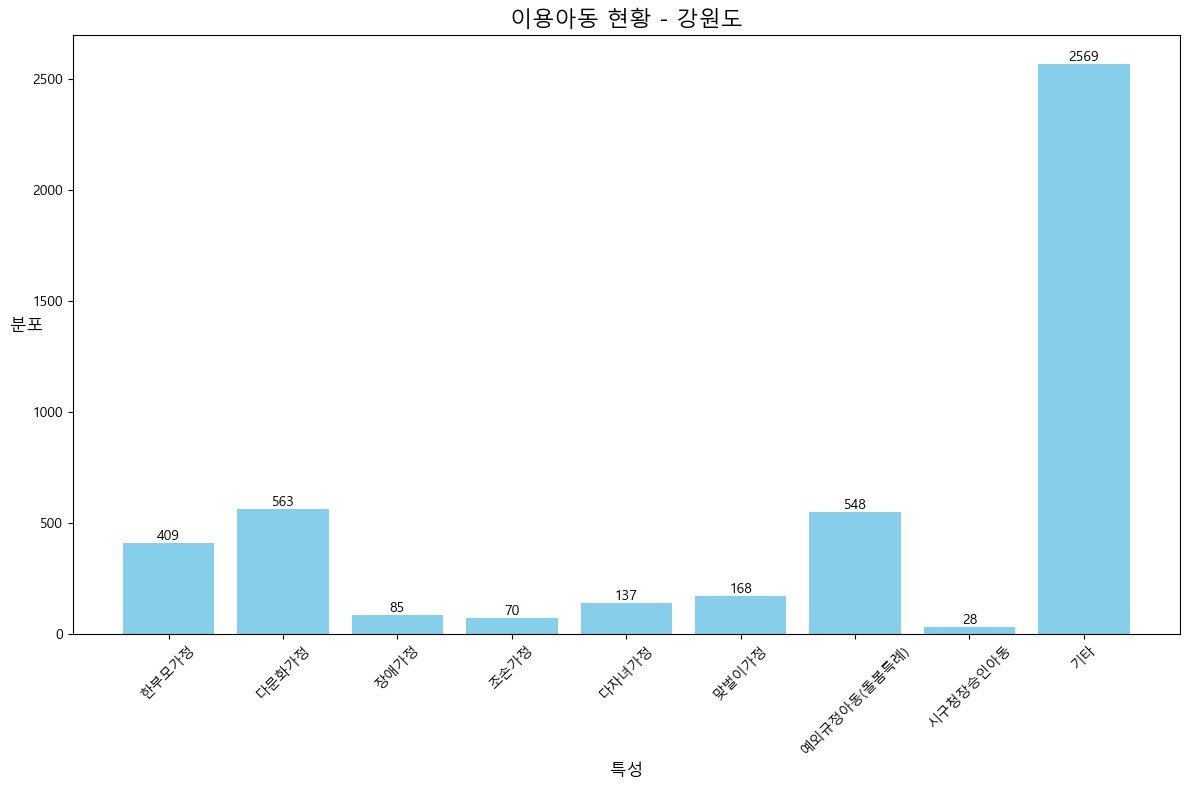

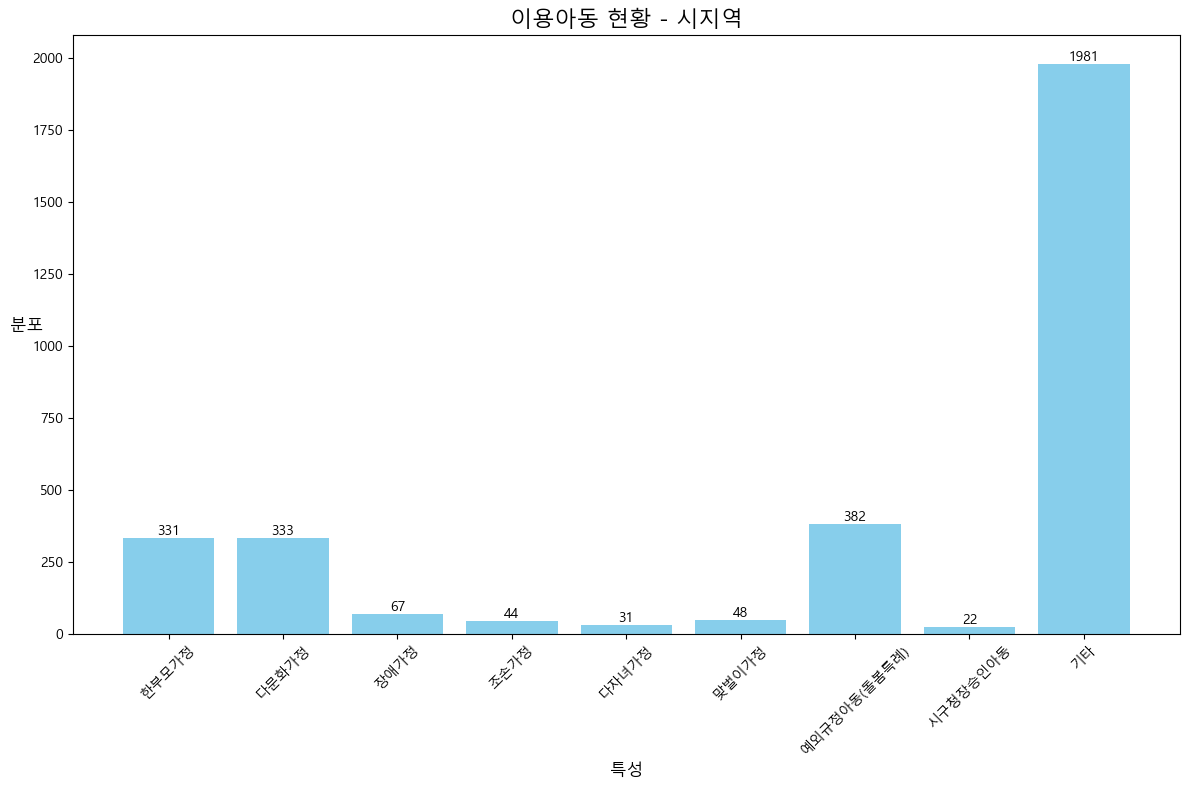

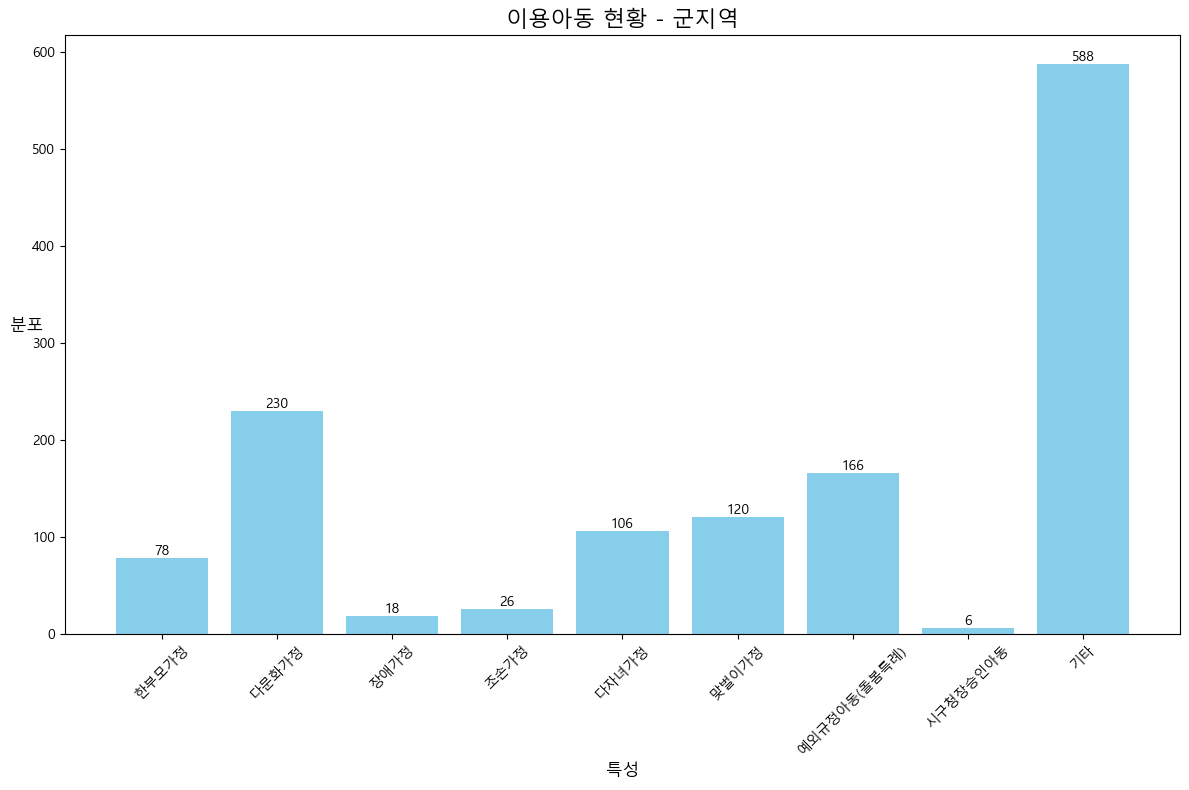

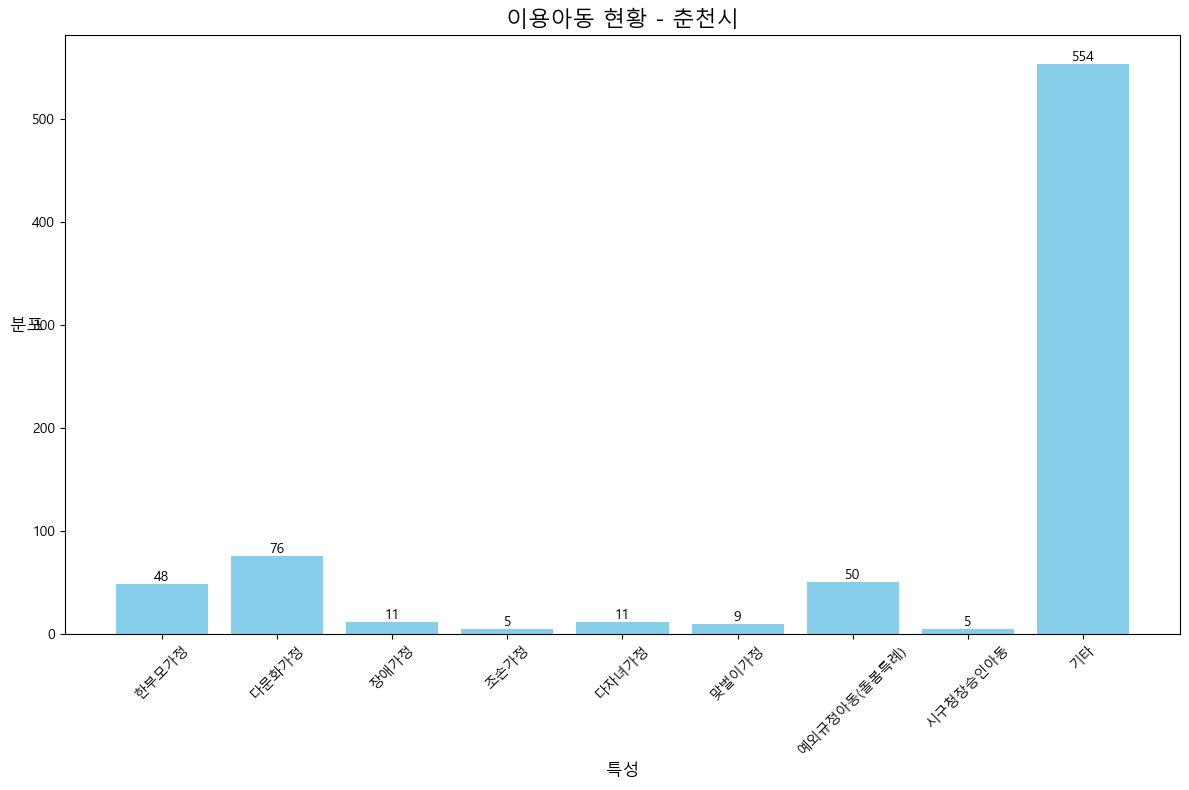

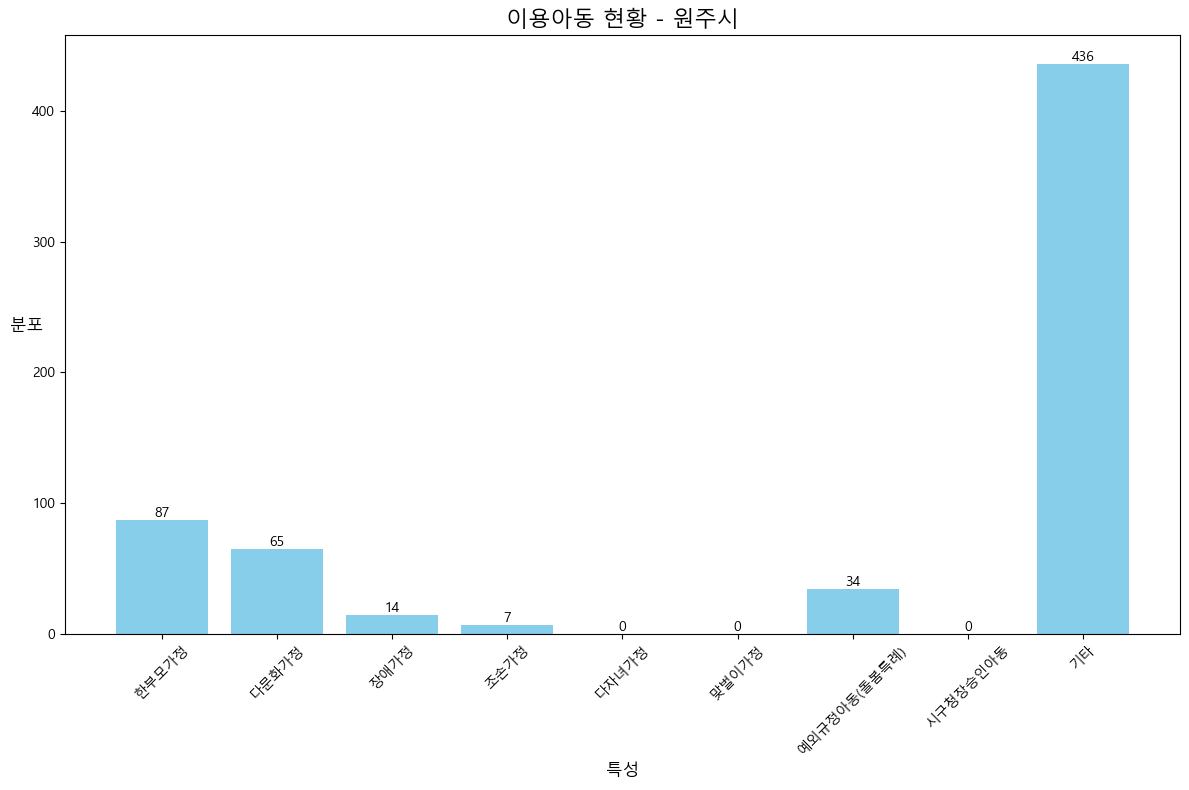

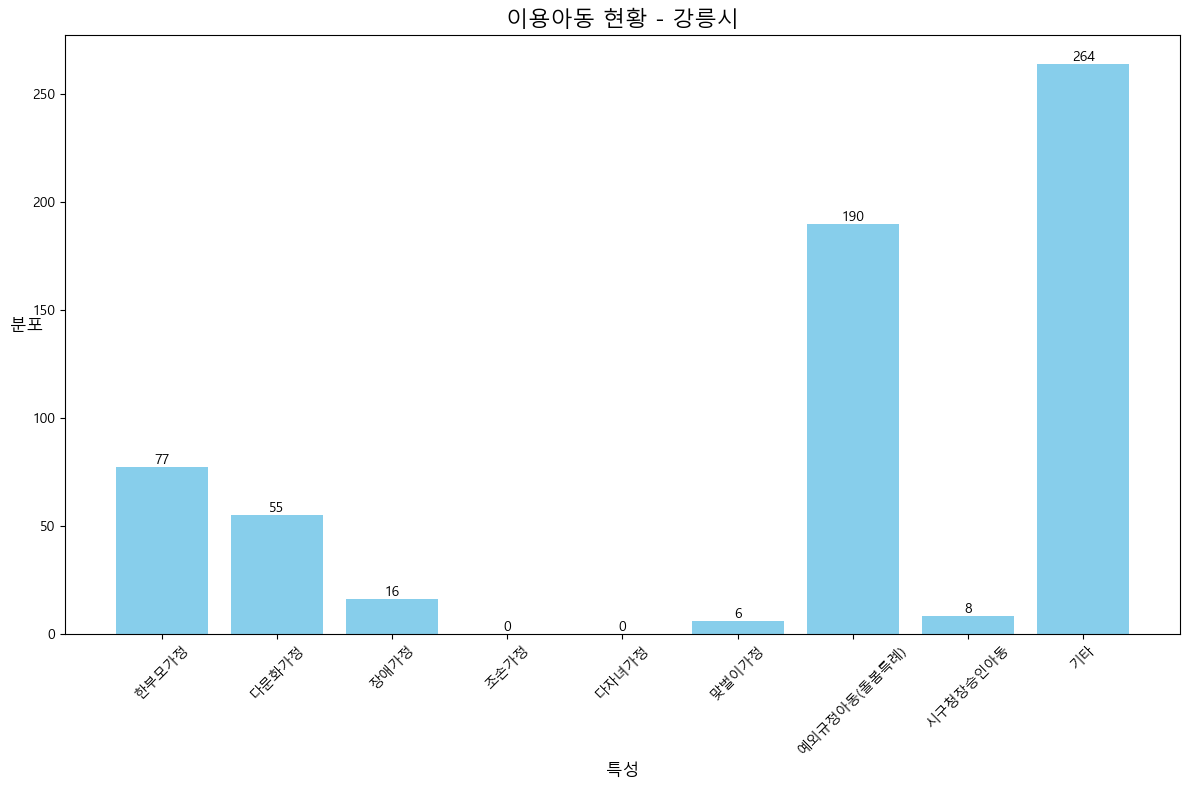

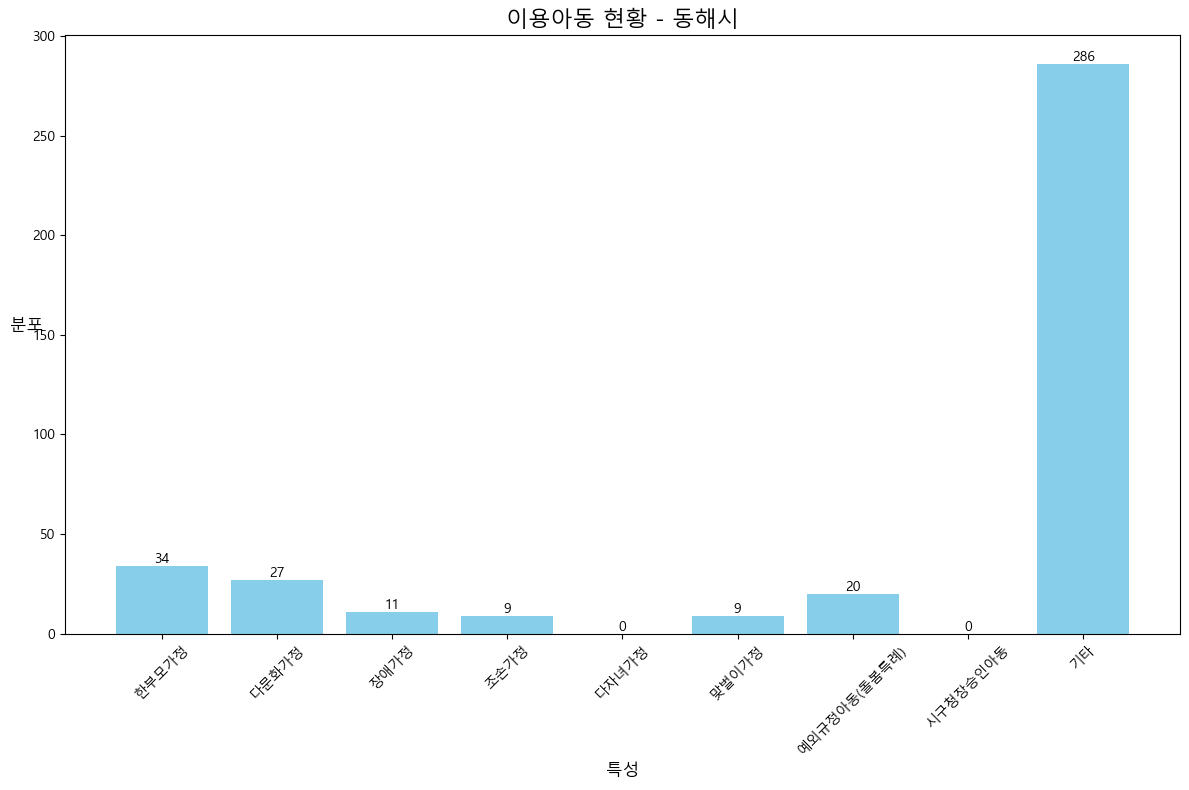

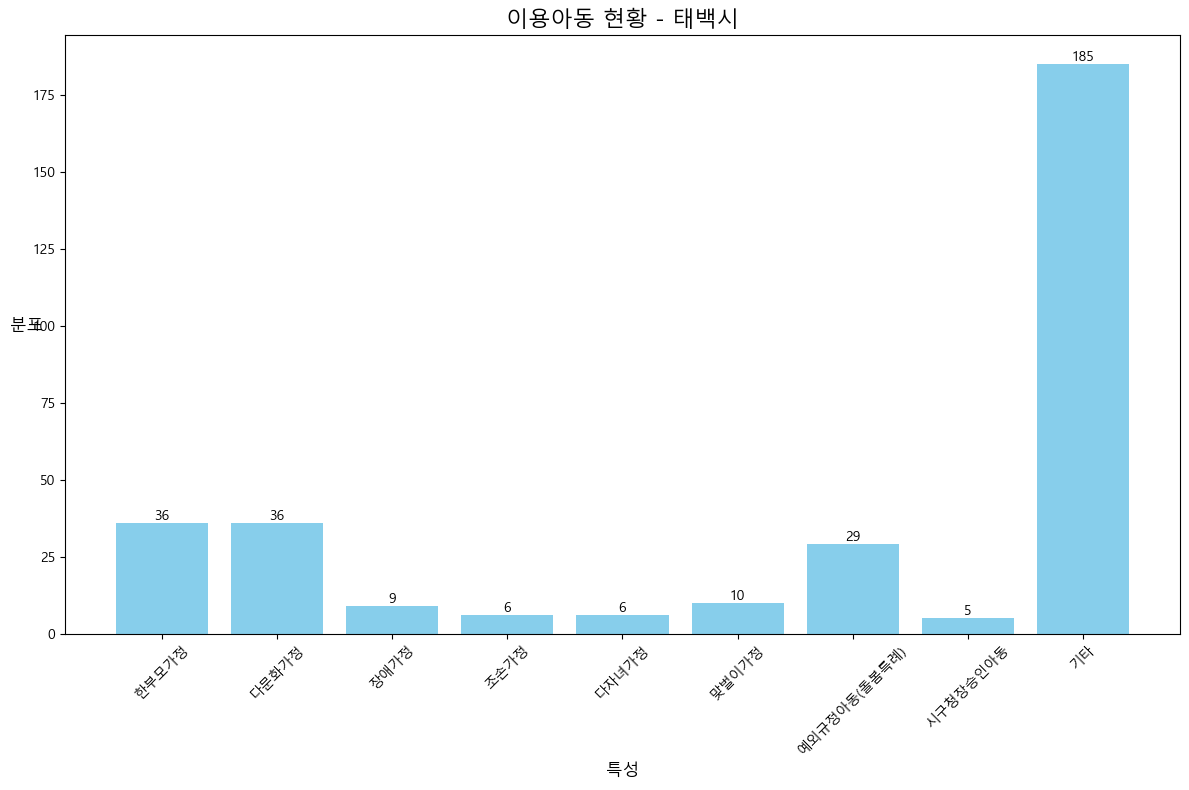

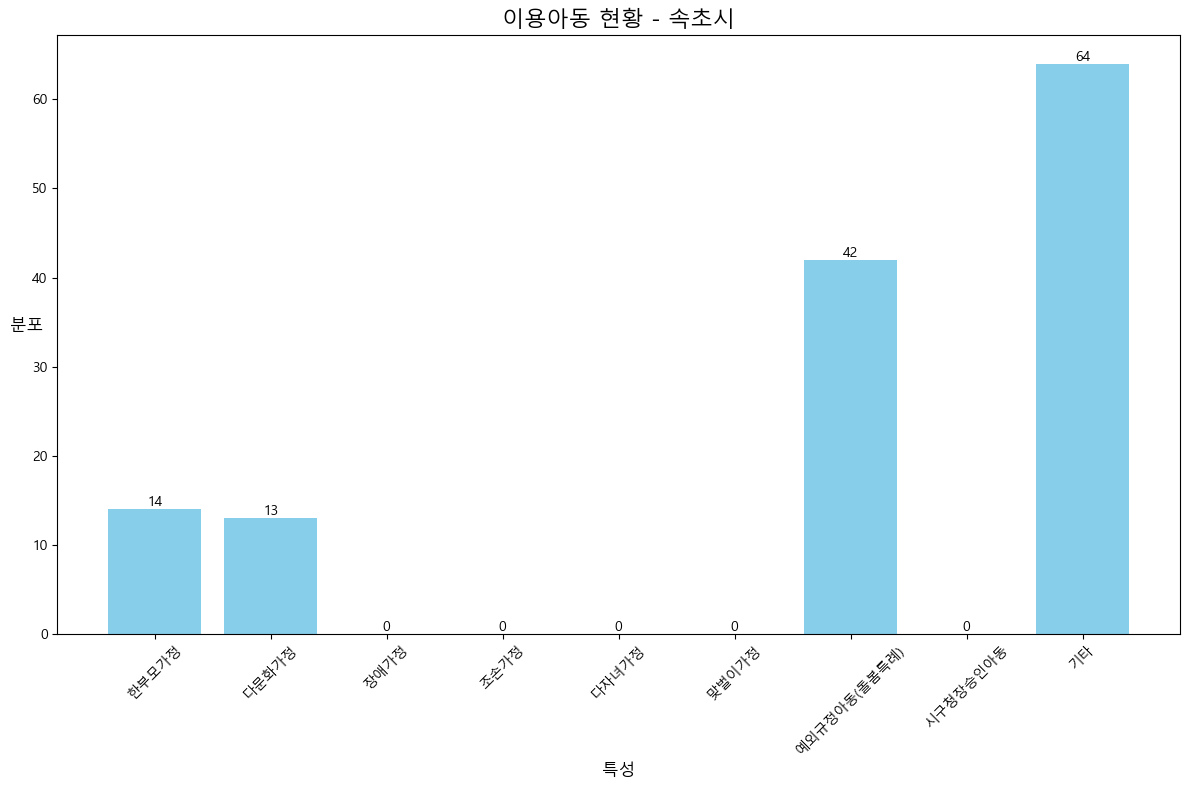

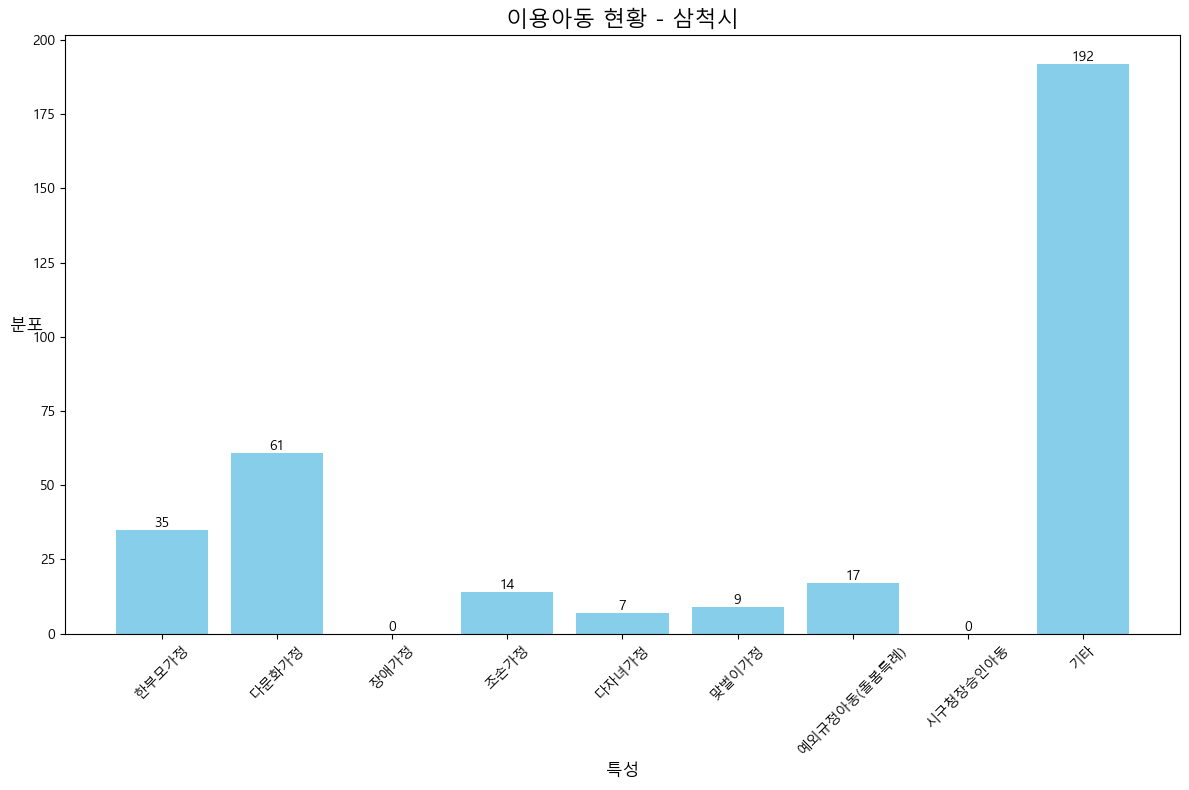

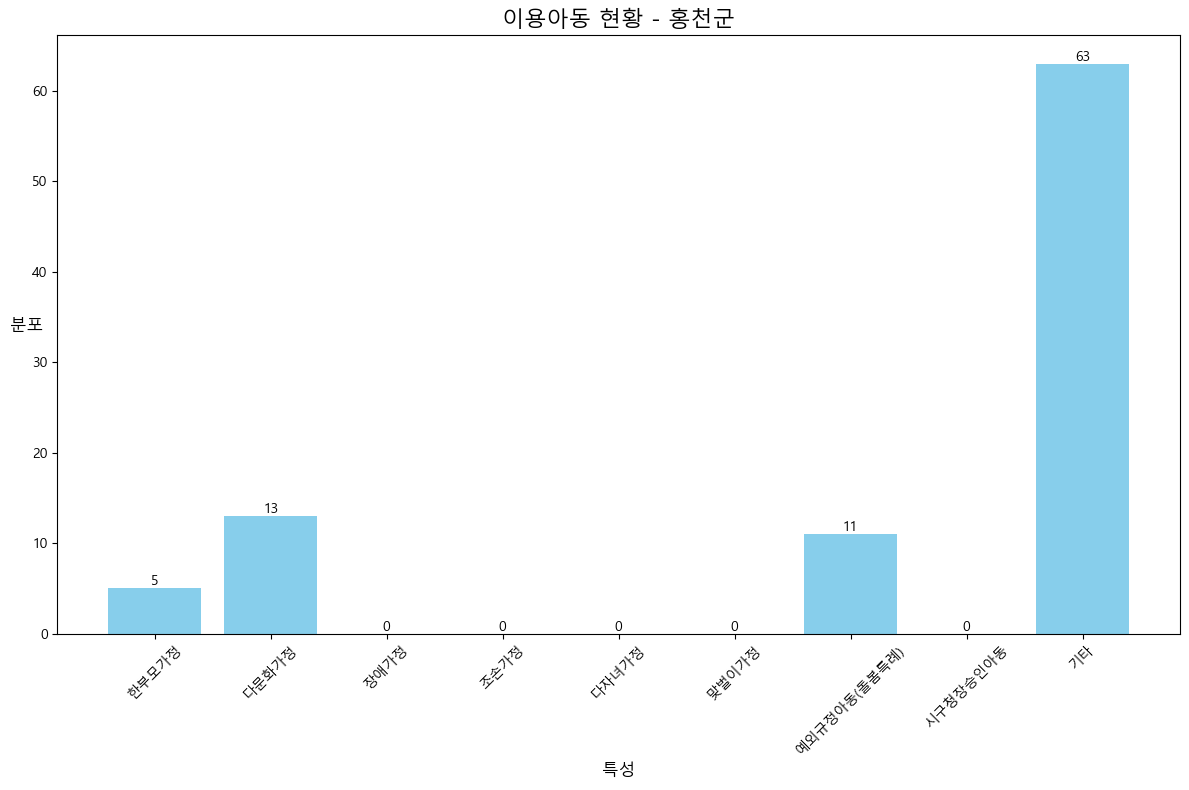

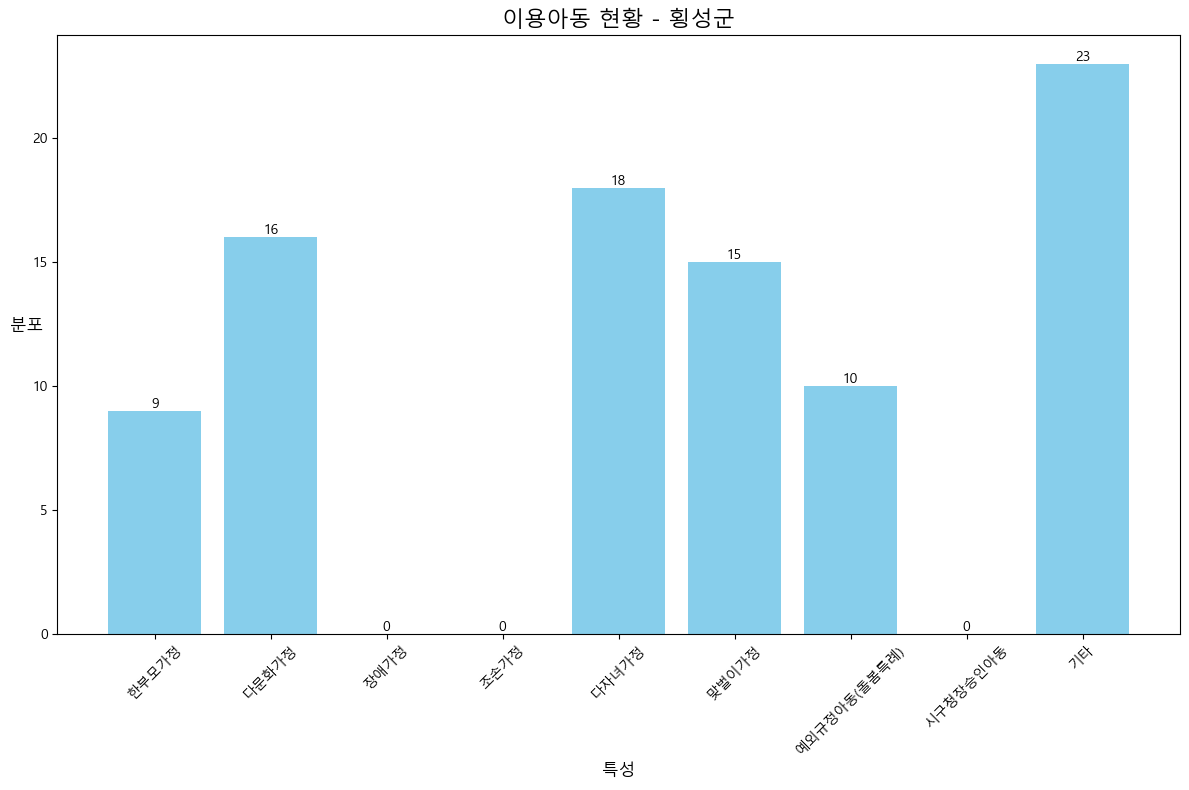

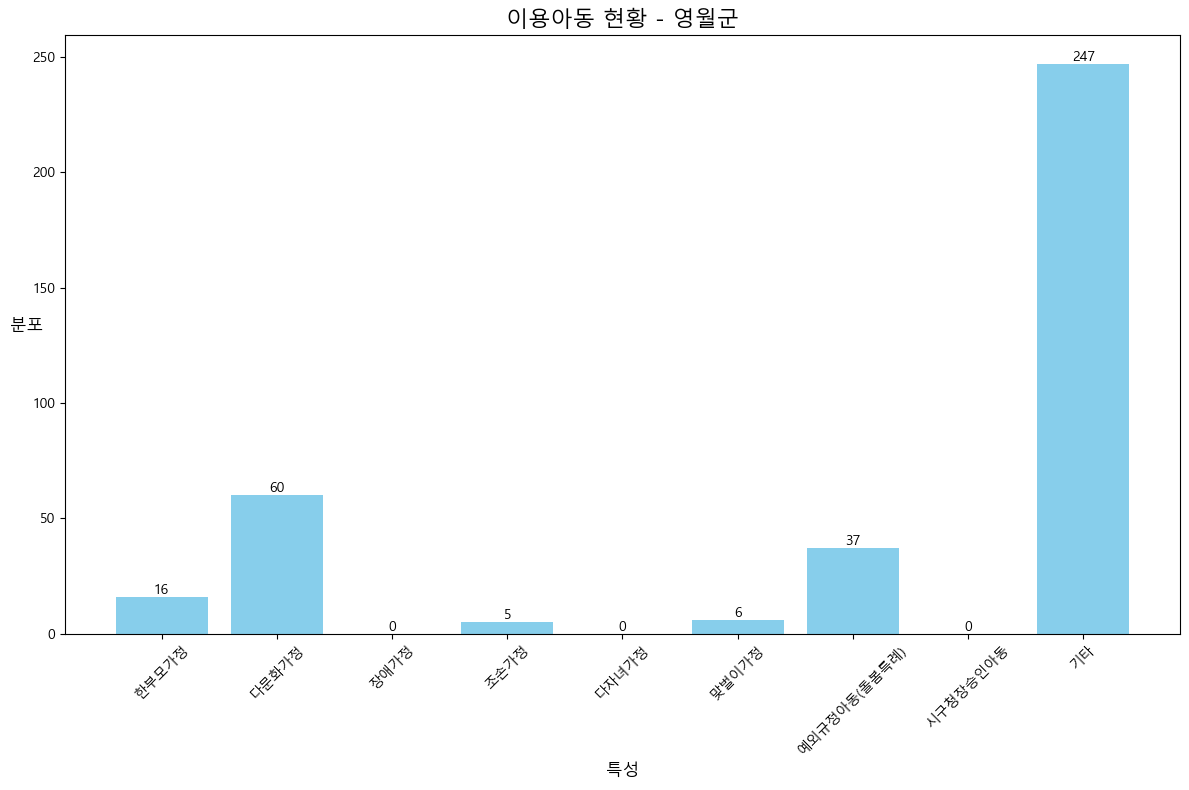

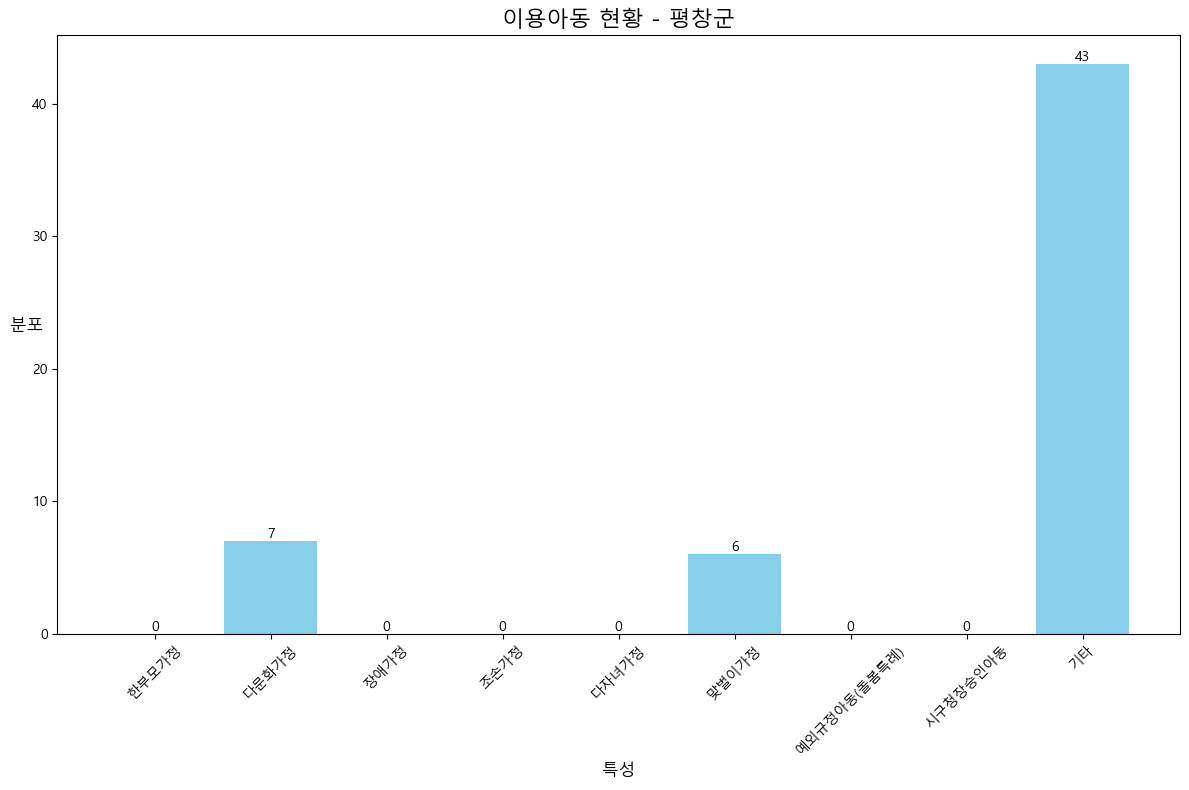

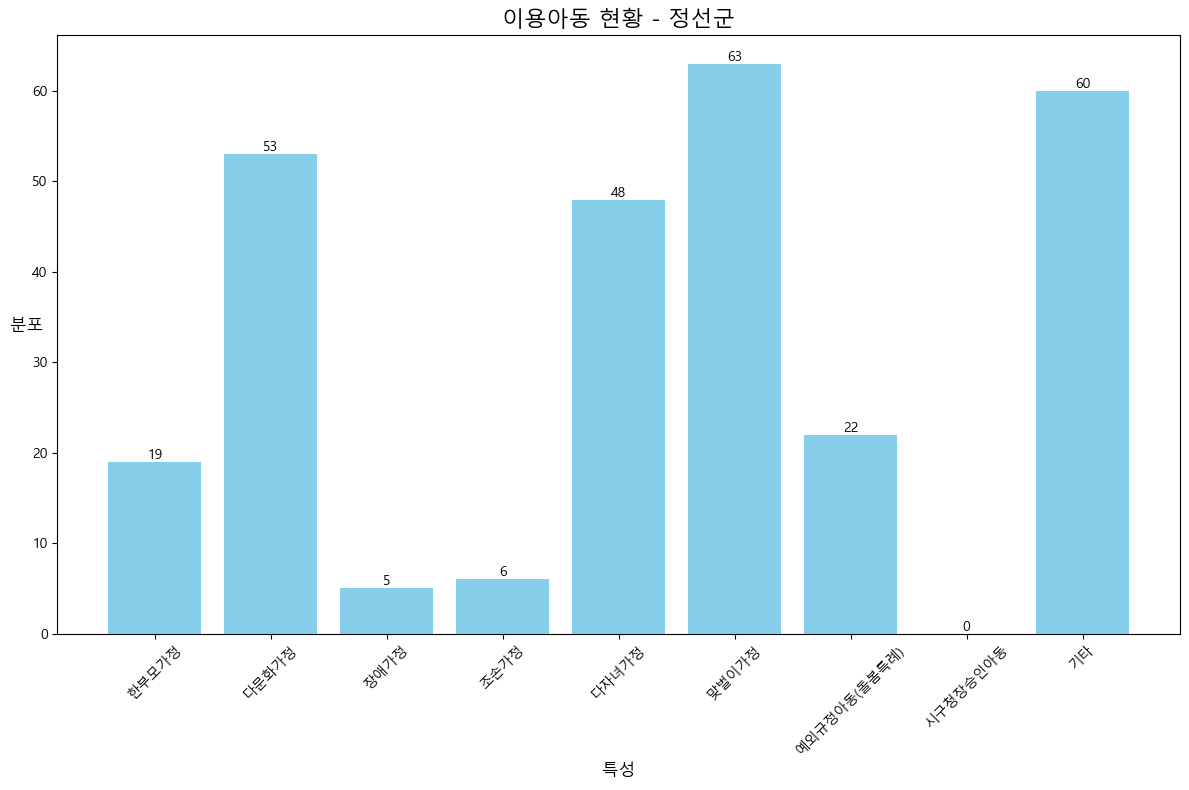

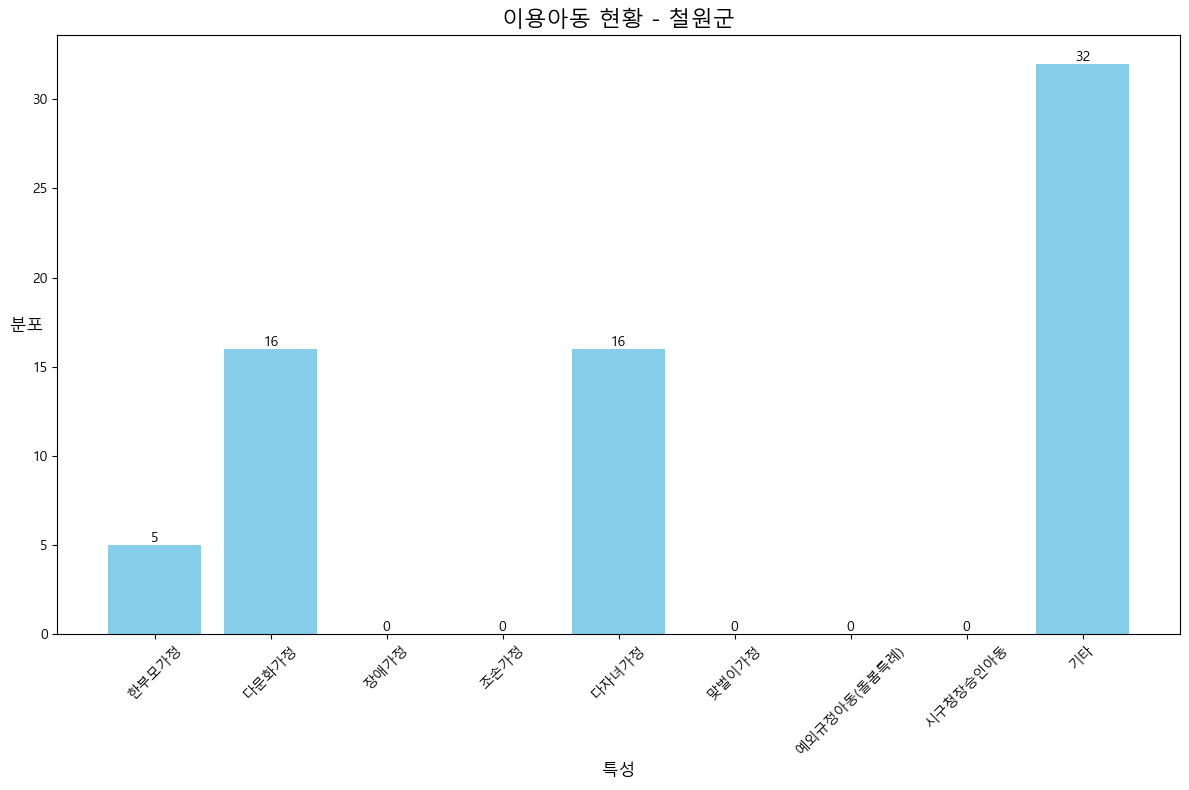

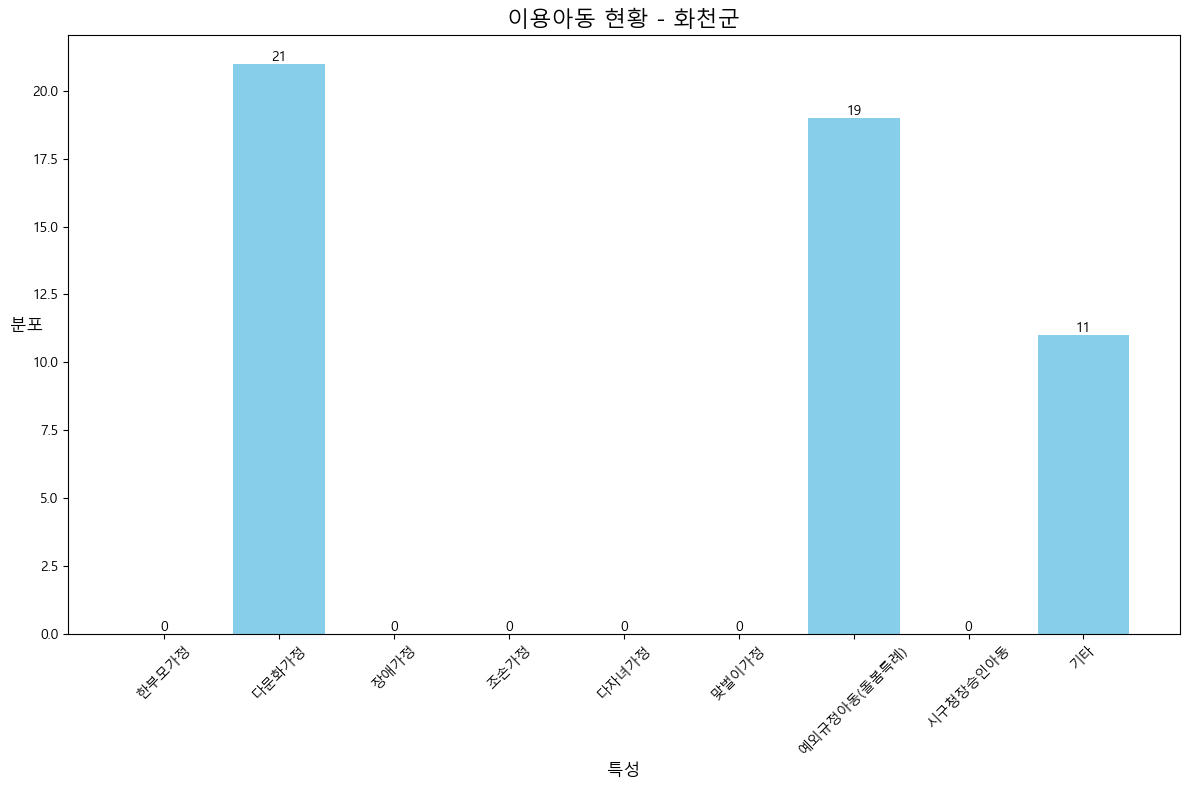

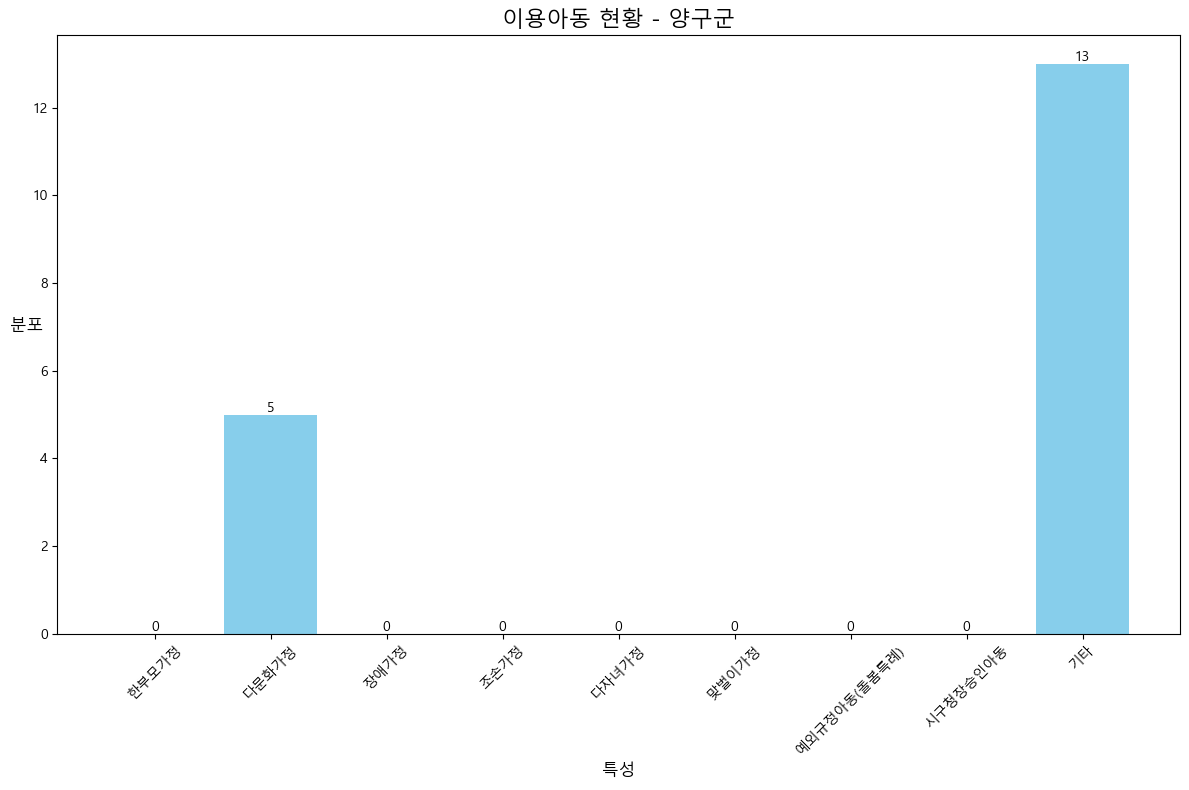

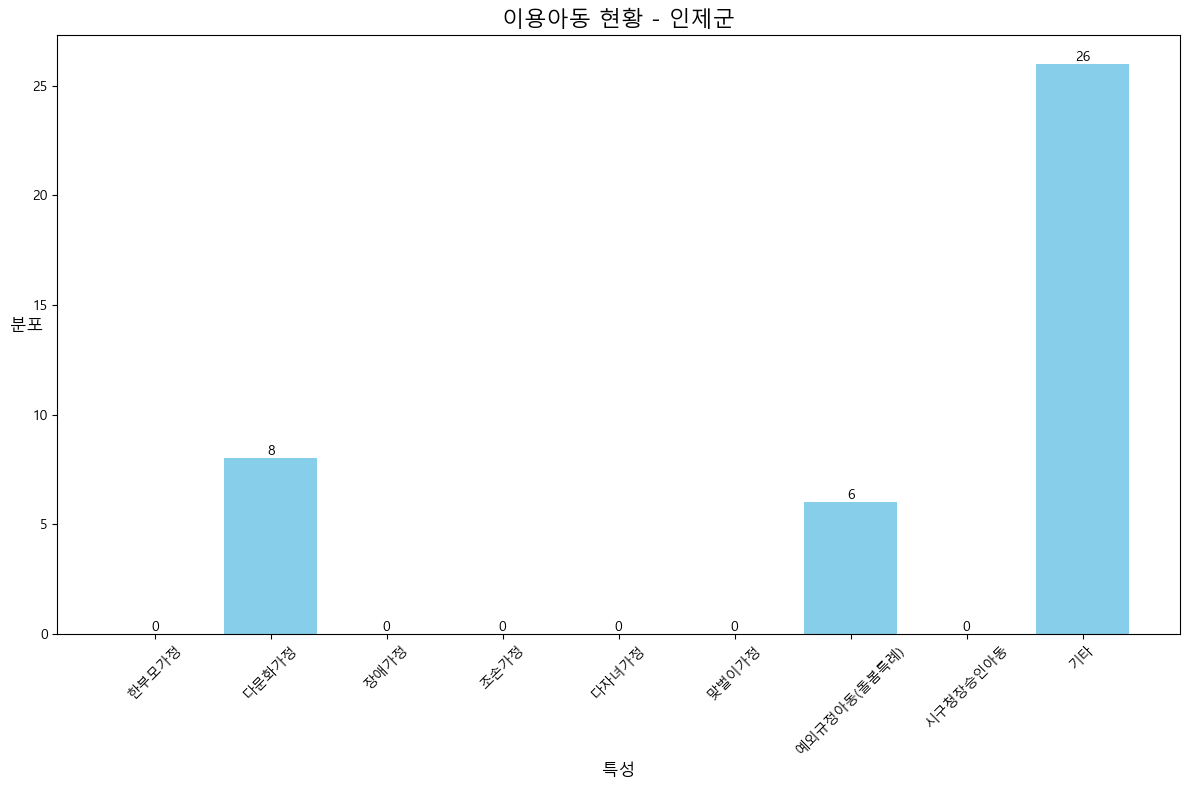

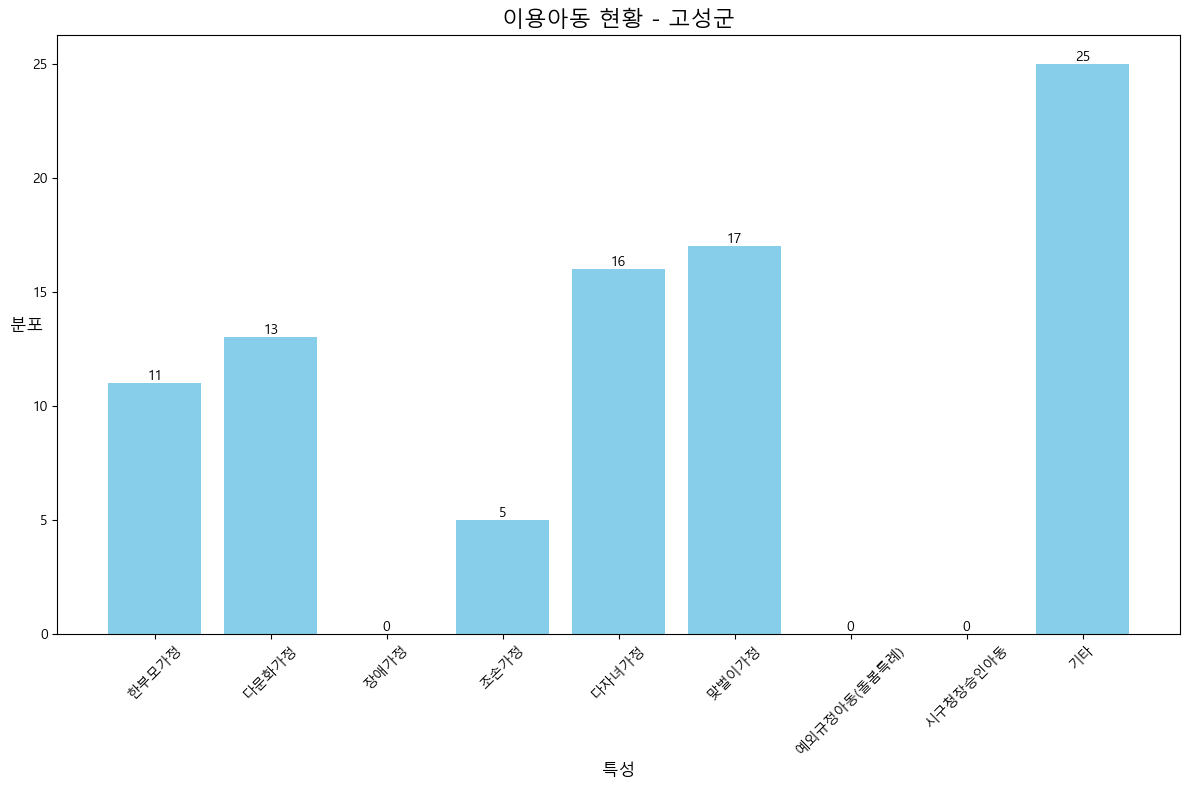

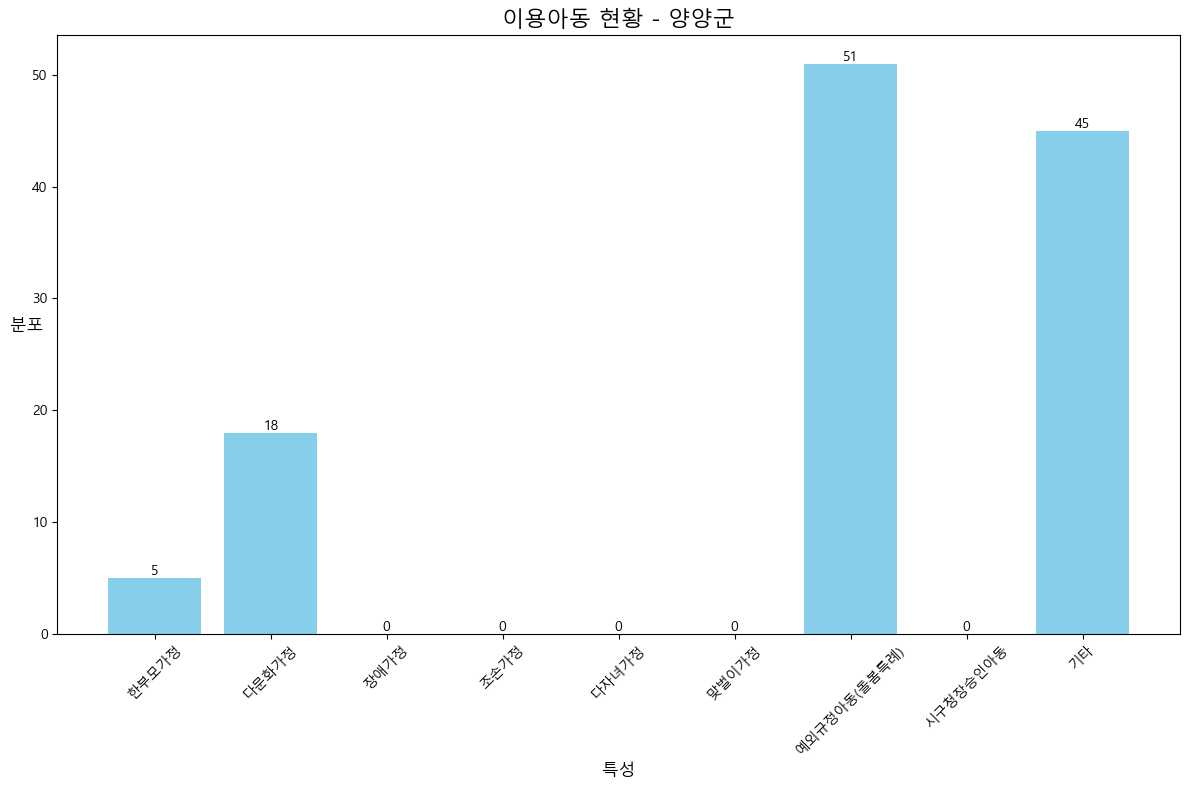

In [35]:
for i in df_use.index:
    draw(i)

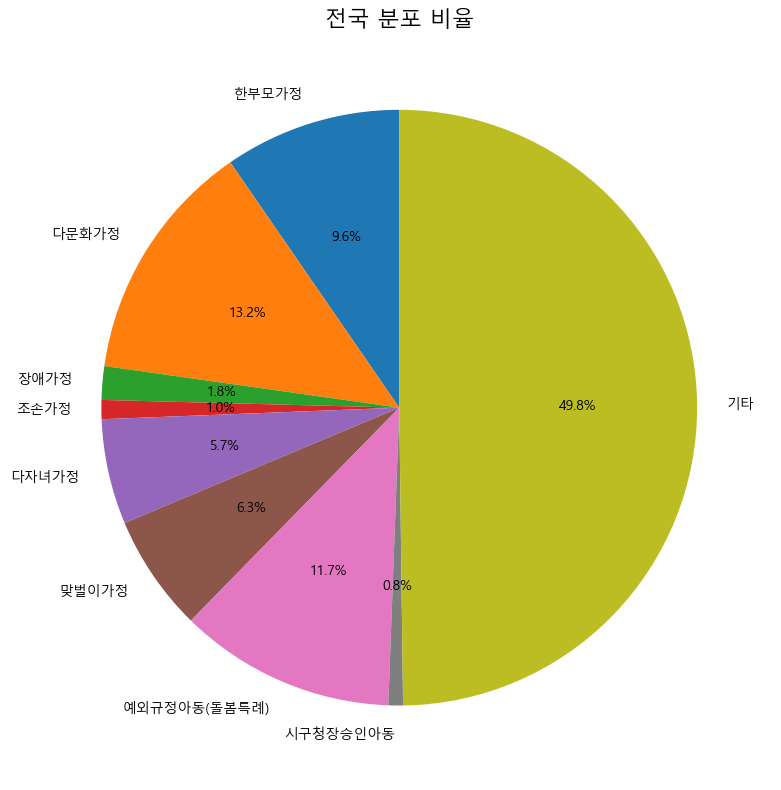

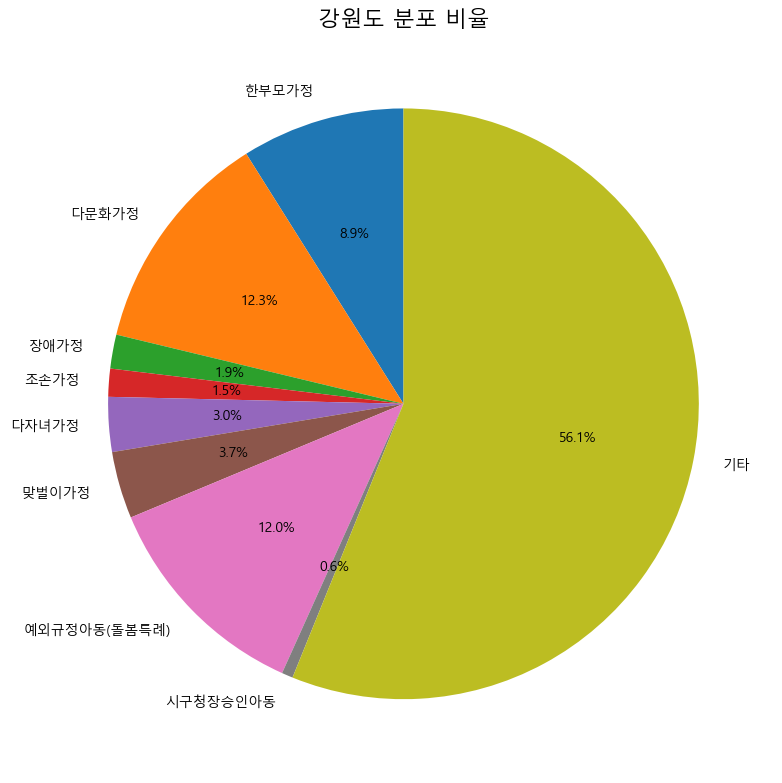

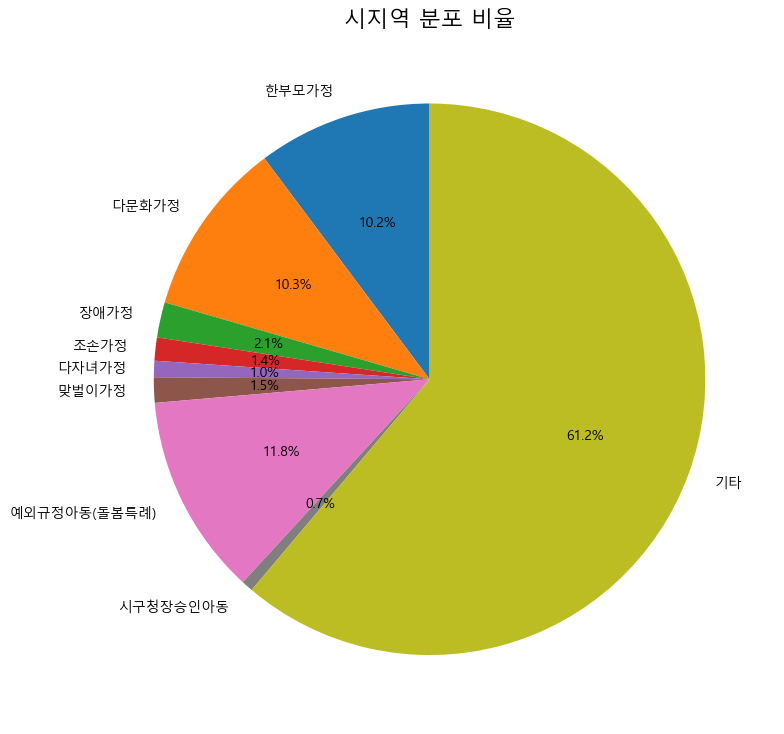

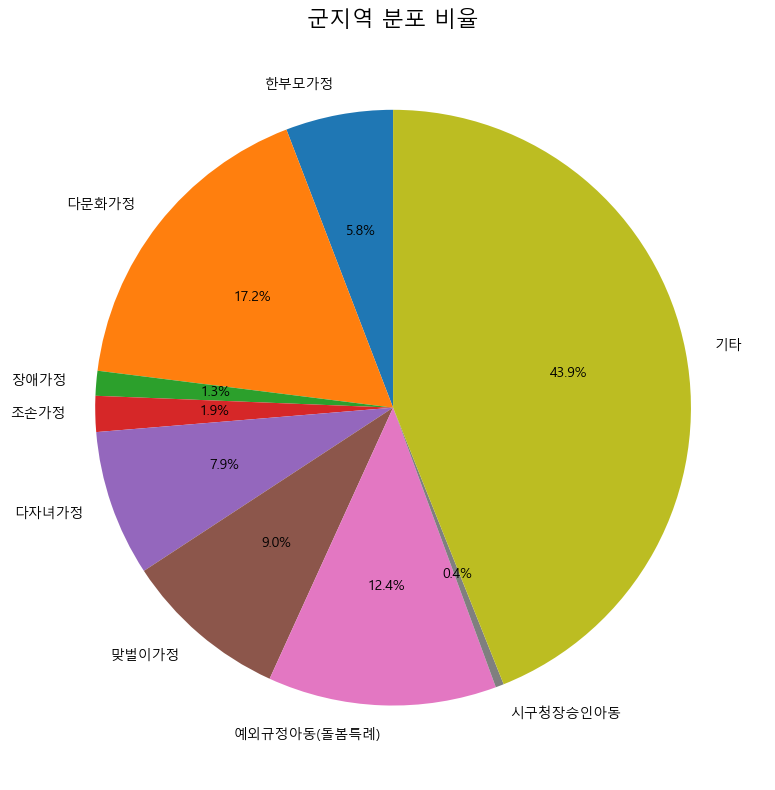

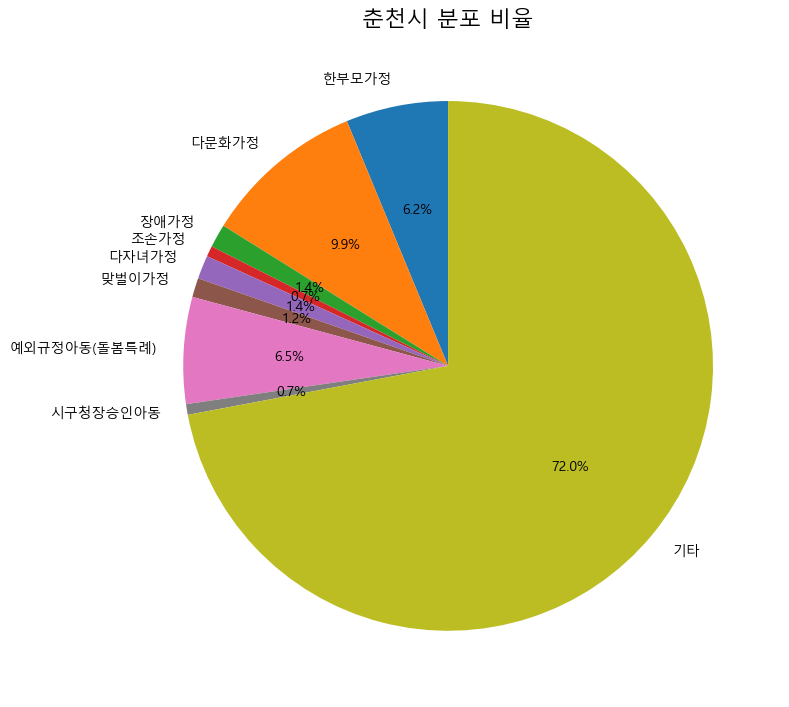

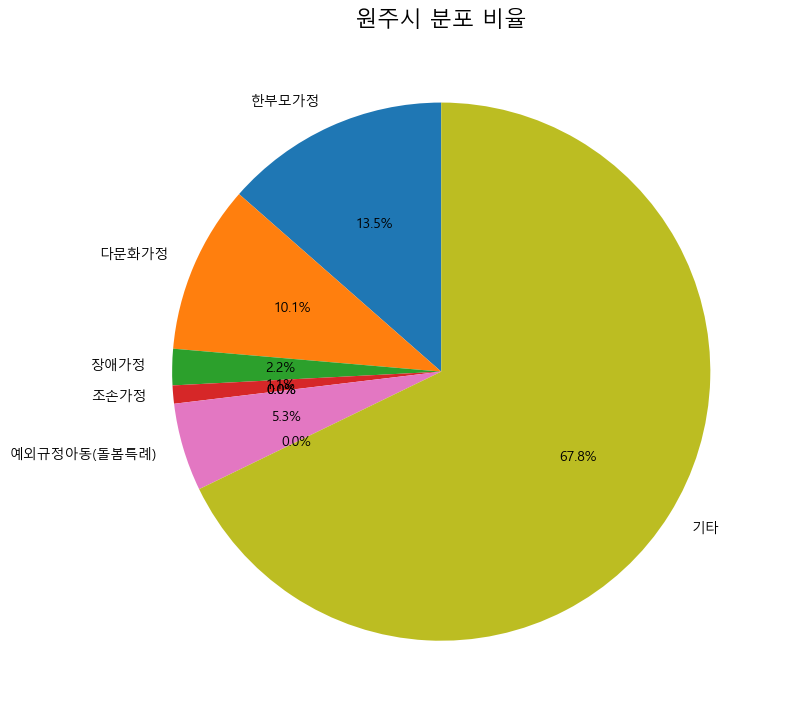

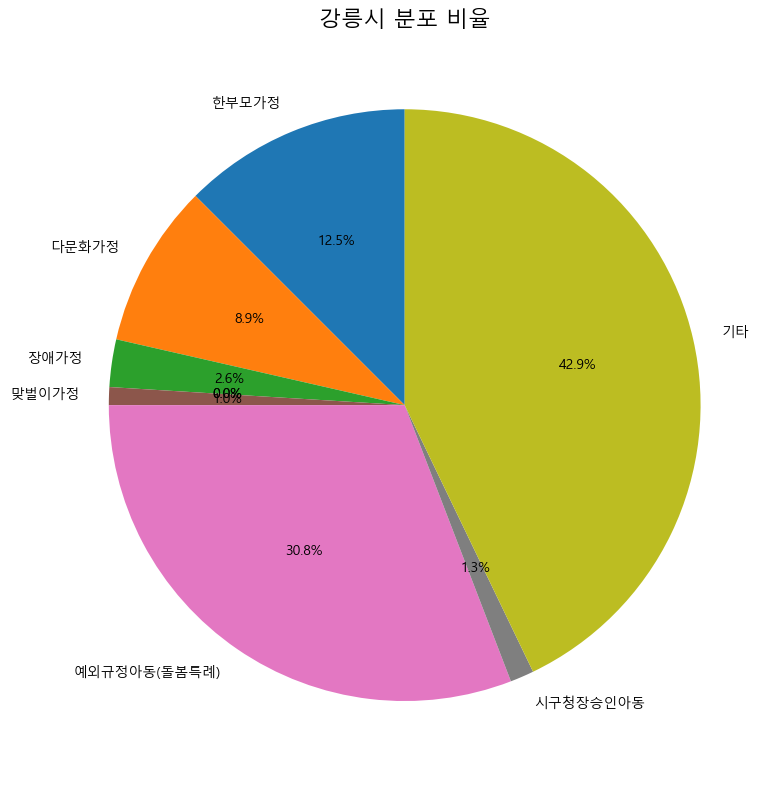

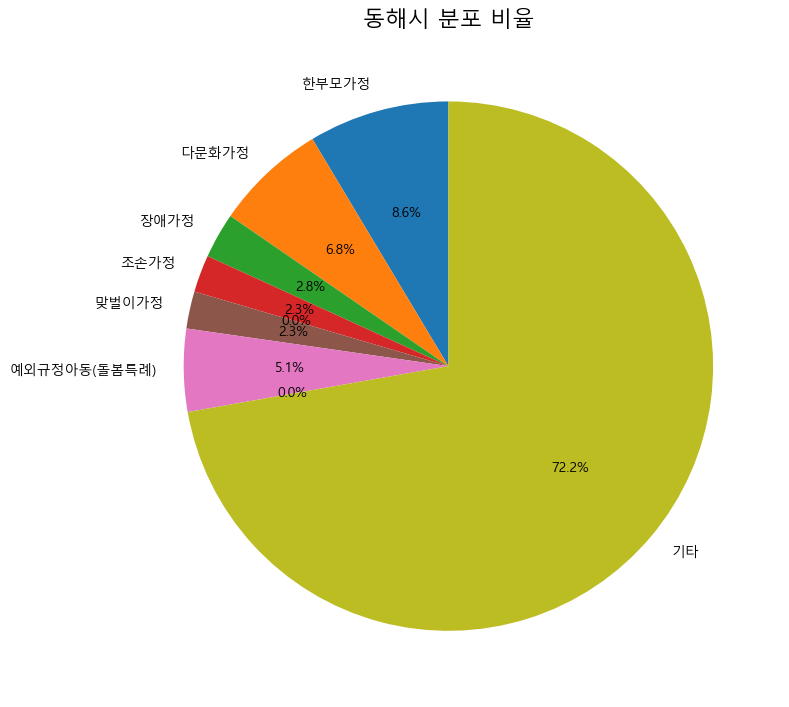

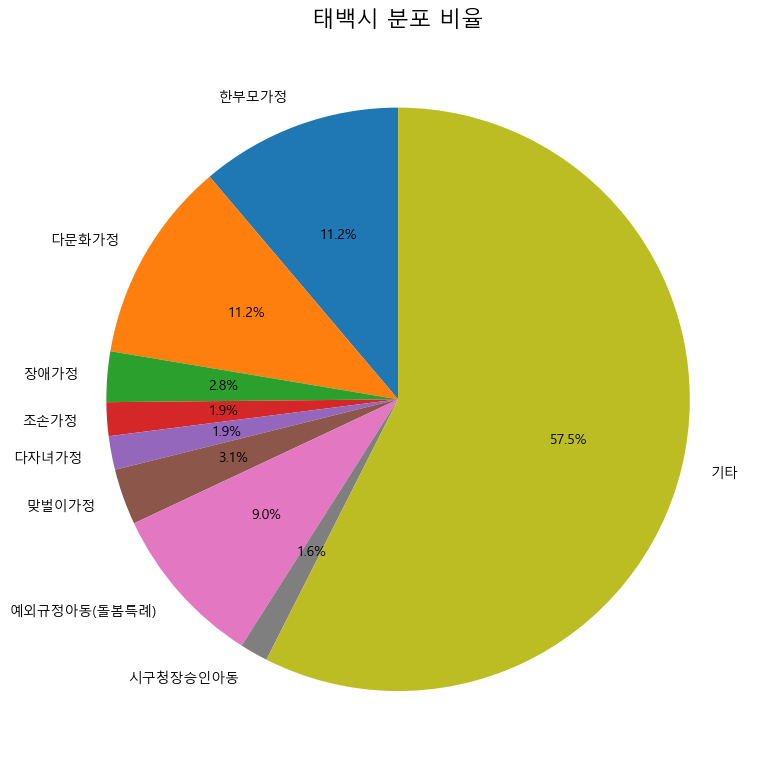

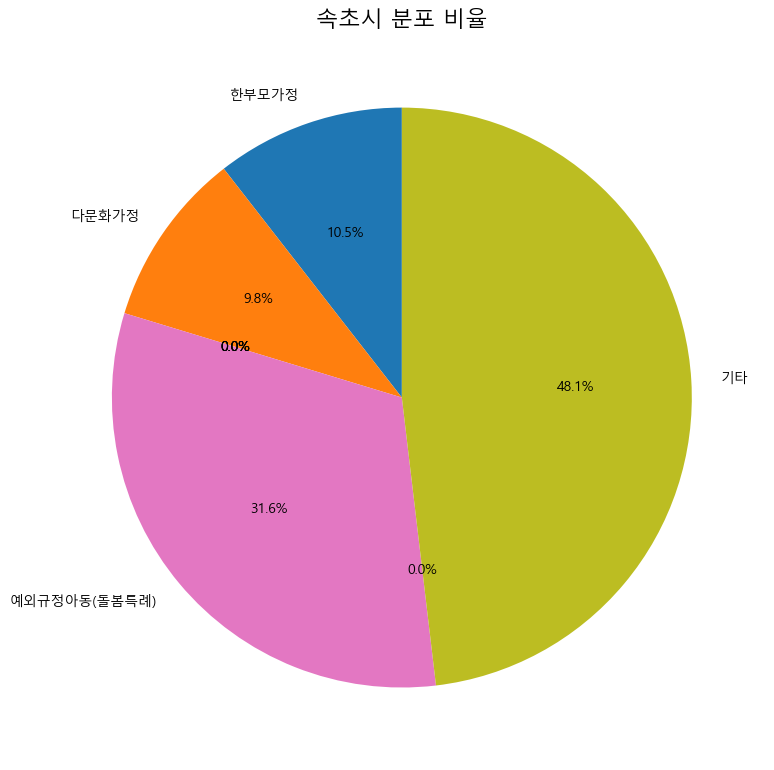

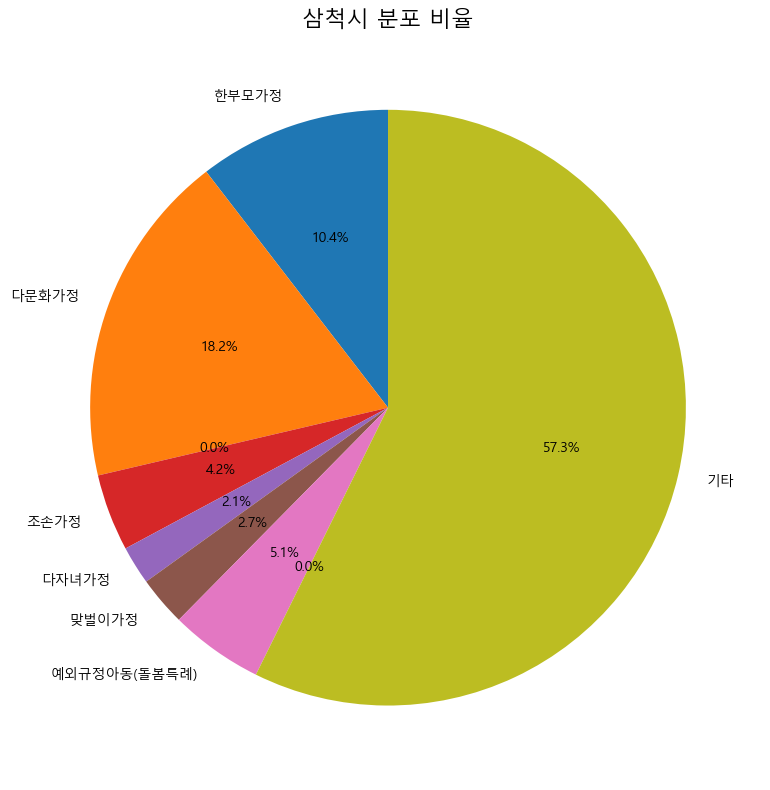

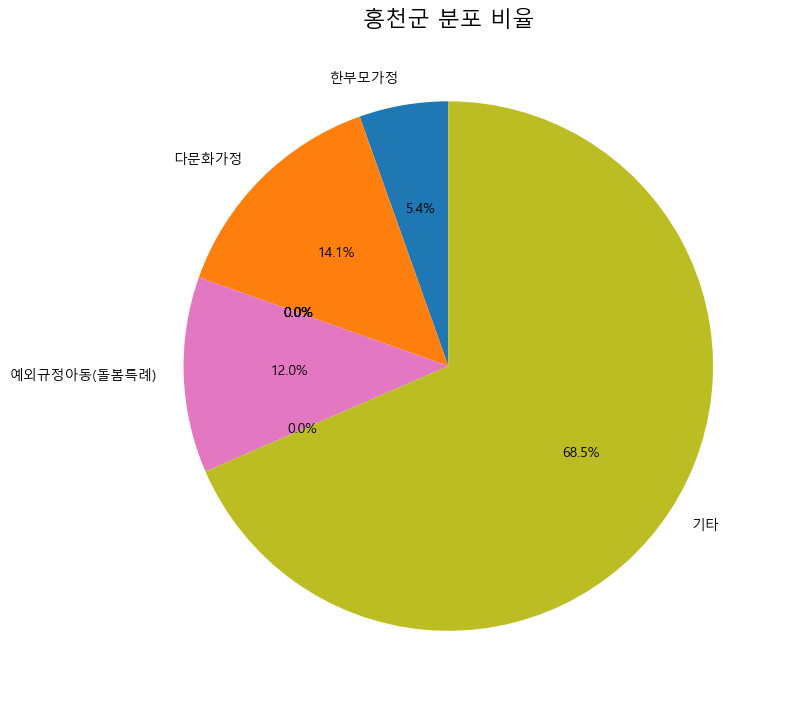

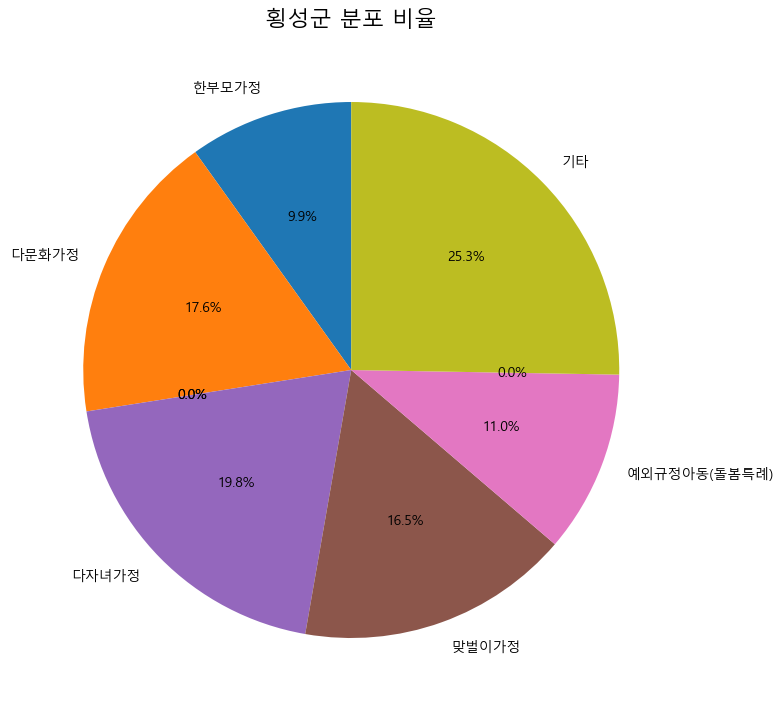

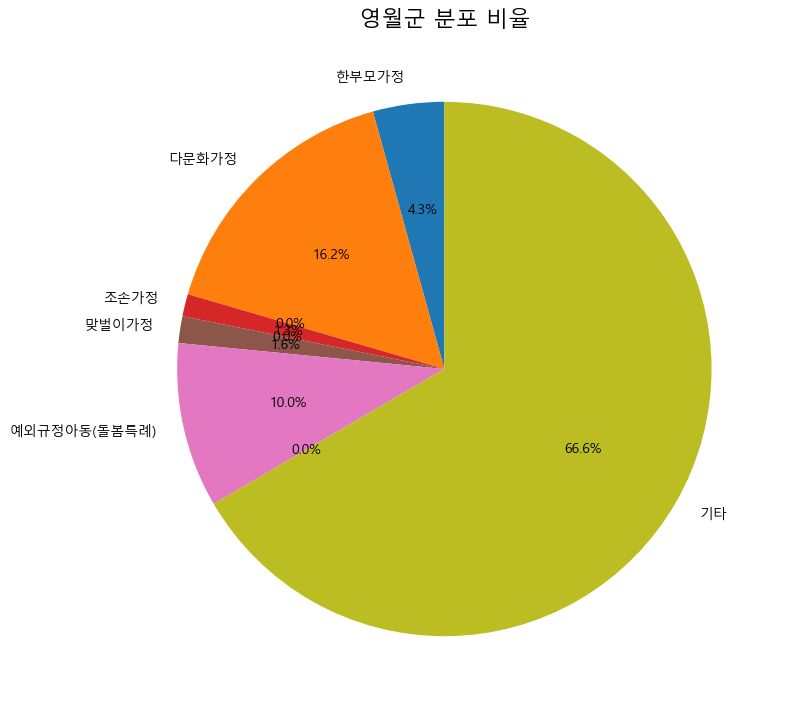

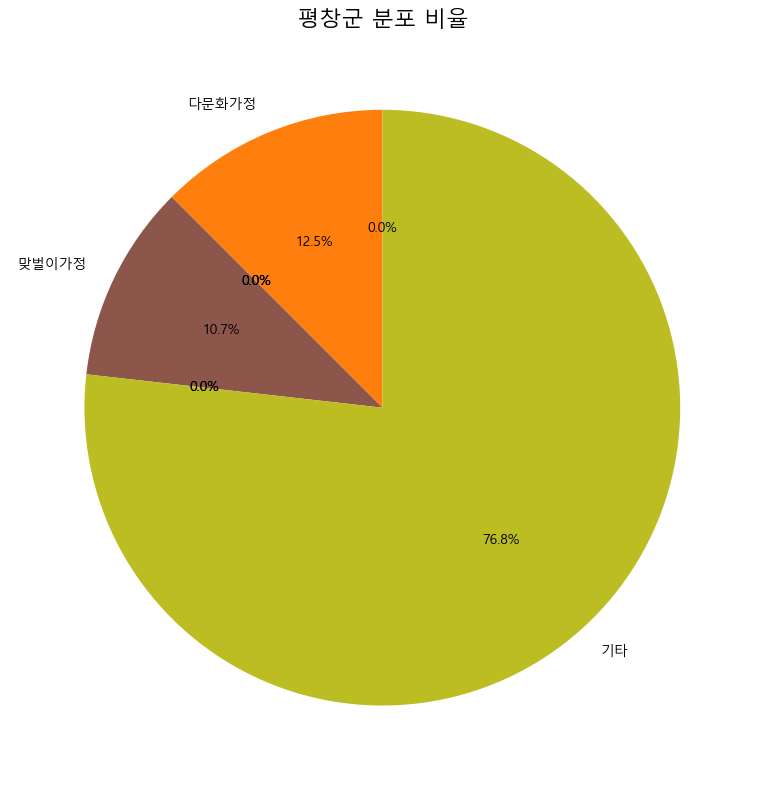

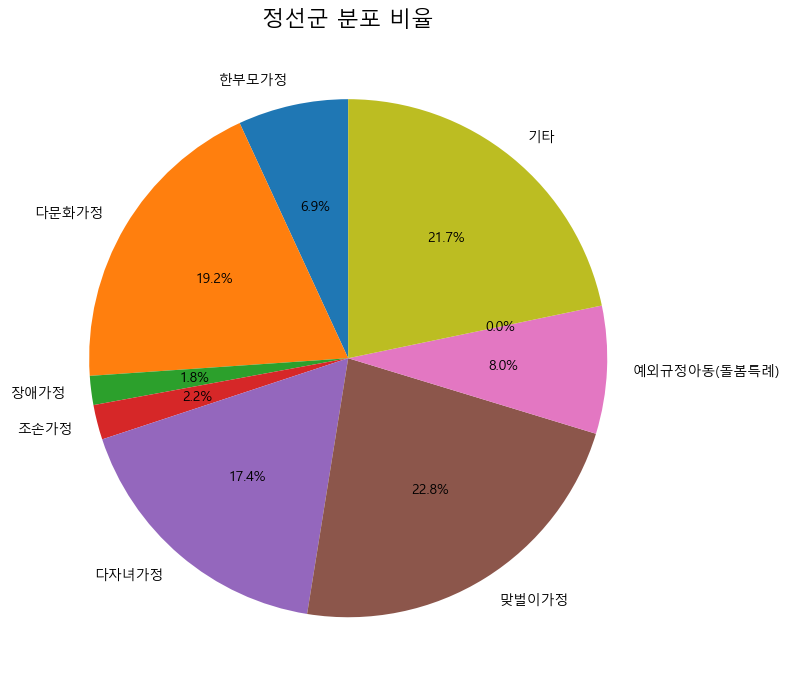

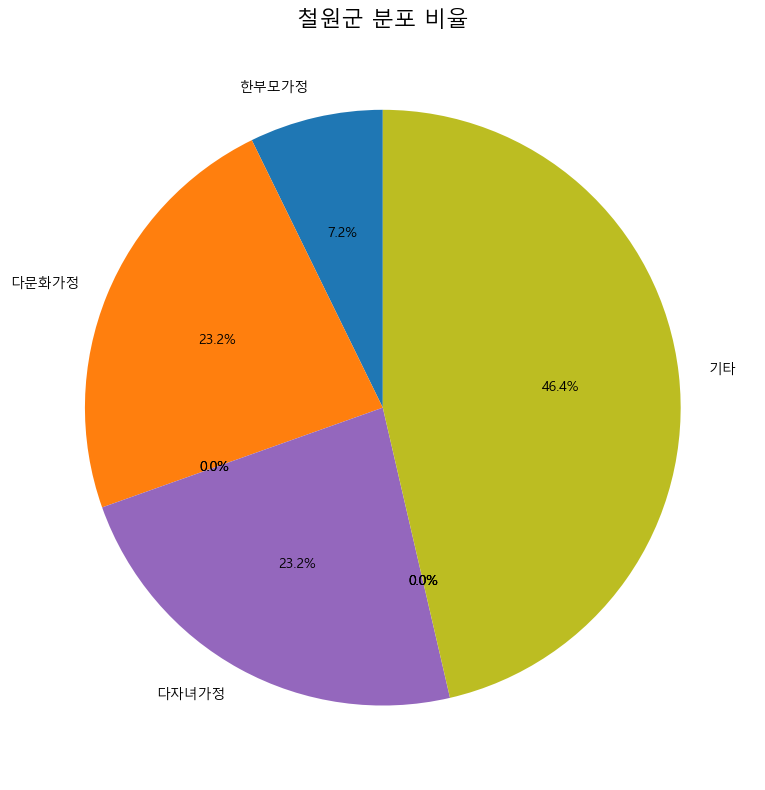

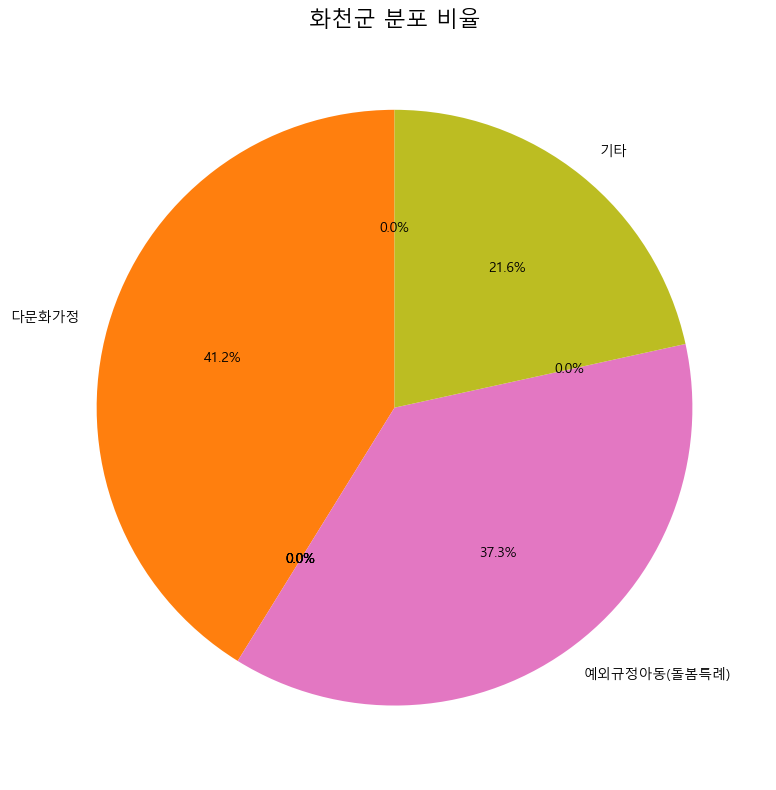

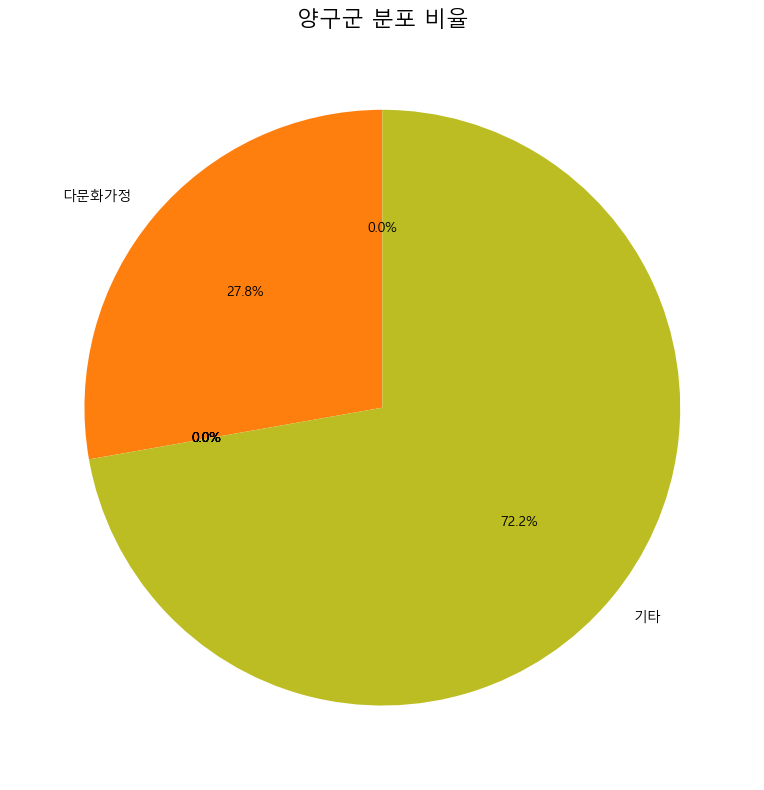

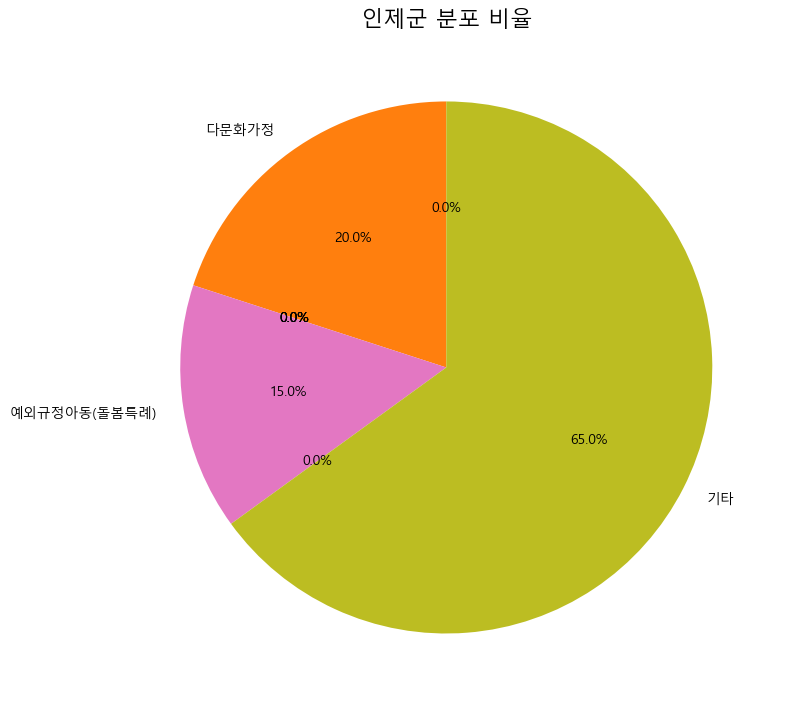

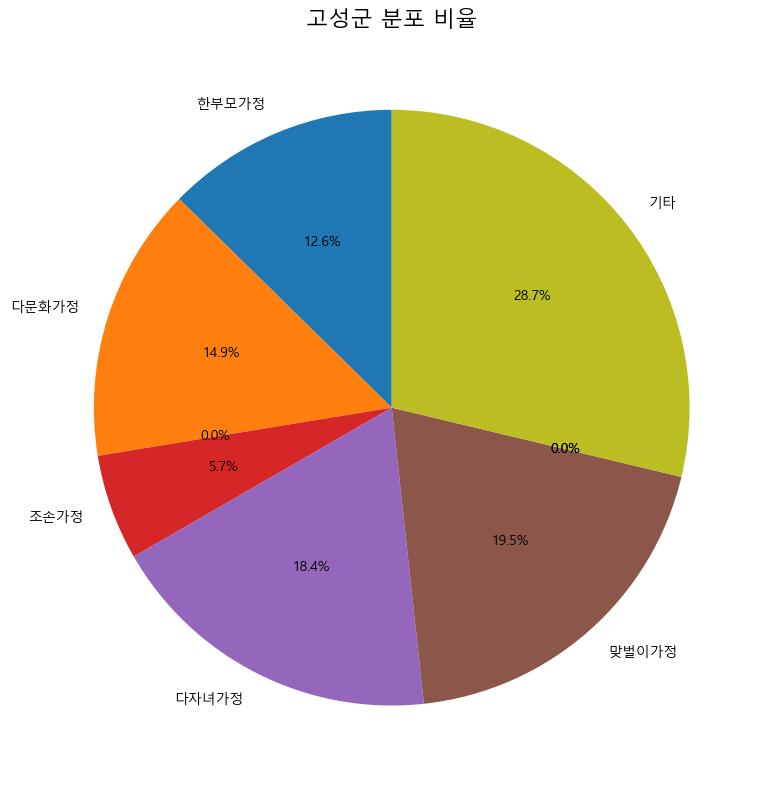

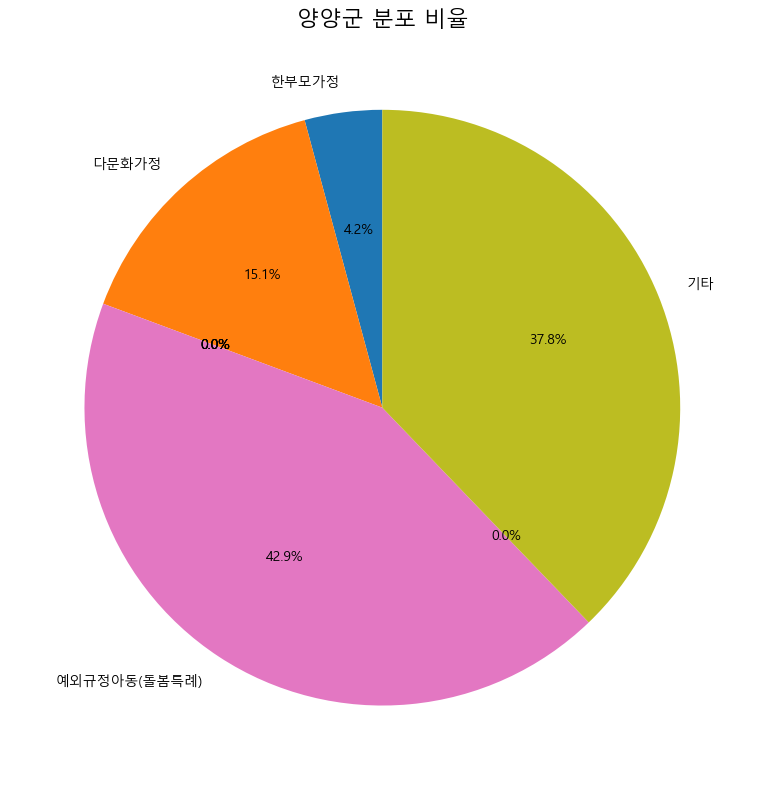

In [36]:
def pie_chart(col):
    # col 값이 df_use의 index에 존재하는지 확인
    if col in df_use.index:
        plt.figure(figsize=(8, 8))
        df_use.loc[col].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
        
        plt.title(f'{col} 분포 비율', fontsize=16)
        plt.ylabel('')  # y축 라벨 제거
        plt.tight_layout()
        plt.show()

# 모든 인덱스에 대해 파이 차트 생성
for col in df_use.index:
    pie_chart(col)

# 사교육 관련 데이터 

## 사교육 참여율 및 참여시간

In [37]:
df_p1 = pd.read_excel('4-6-1. 사교육(사교육 참여율 및 참여시간).xlsx')

In [38]:
df_p1['Unnamed: 1'].loc[1]='전체-참여율'
df_p1['Unnamed: 2'].loc[1]='전체-참여시간'
df_p1['Unnamed: 3'].loc[1]='초등학교-참여율'
df_p1['Unnamed: 4'].loc[1]='초등학교-참여시간'
df_p1['Unnamed: 5'].loc[1]='중학교-참여율'
df_p1['Unnamed: 6'].loc[1]='중학교-참여시간'
df_p1['Unnamed: 7'].loc[1]='고등학교-참여율'
df_p1['Unnamed: 8'].loc[1]='고등학교-참여시간'
df_p1['Unnamed: 9'].loc[1]='일반고-참여율'
df_p1['Unnamed: 10'].loc[1]='일반고-참여시간'

C:\Users\노준영\AppData\Local\Temp\ipykernel_5512\441186271.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_p1['Unnamed: 1'].loc[1]='전체-참여율'
C:\Users\노준영\AppData\Local\Temp\ipykernel_5512\441186271.py:2: FutureWarning: ChainedAssignmentE

In [39]:
df_p1 = df_p1.drop([0,2,20,21])

In [40]:
df_p1.columns = df_p1.iloc[0]  # 0번 행을 열 이름으로 설정
df_p1 = df_p1[1:].reset_index(drop=True)  # 0번 행 제거 및 인덱스 초기화

In [41]:
df_p1 = df_p1.set_index('연도')
df_p1

1,전체-참여율,전체-참여시간,초등학교-참여율,초등학교-참여시간,중학교-참여율,중학교-참여시간,고등학교-참여율,고등학교-참여시간,일반고-참여율,일반고-참여시간
연도,,,,,,,,,,
2007,77,7.8,88.8,8.9,74.6,8.9,55,4.5,62,5.2
2008,75.1,7.6,87.9,8.9,72.5,8.4,53.4,4.4,60.5,5.1
2009,75,7.4,87.4,8.6,74.3,8.3,53.8,4.3,62.8,5.1
2010,73.6,7,86.8,8.2,72.2,7.7,52.8,4.1,61.1,4.8
2011,71.7,6.6,84.6,7.8,71,7.2,51.6,4,58.7,4.6
2012,69.4,6,80.9,7,70.6,6.6,50.7,3.9,57.6,4.4
2013,68.8,5.9,81.8,6.9,69.5,6.5,49.2,3.8,55.9,4.4
2014,68.6,5.8,81.1,6.6,69.1,6.5,49.5,4,56.2,4.5
2015,68.8,5.7,80.7,6.4,69.4,6.4,50.2,4.1,56.8,4.7


In [42]:
# 참여율과 참여시간으로 분리
참여율_df = df_p1.filter(like="참여율")
참여시간_df = df_p1.filter(like="참여시간")

# 연도를 다시 포함
참여율_df.insert(0, "연도", df_p1.index)
참여시간_df.insert(0, "연도", df_p1.index)


In [43]:
display(참여율_df)
display(참여시간_df)

1,연도,전체-참여율,초등학교-참여율,중학교-참여율,고등학교-참여율,일반고-참여율
연도,,,,,,
2007,2007,77,88.8,74.6,55,62
2008,2008,75.1,87.9,72.5,53.4,60.5
2009,2009,75,87.4,74.3,53.8,62.8
2010,2010,73.6,86.8,72.2,52.8,61.1
2011,2011,71.7,84.6,71,51.6,58.7
2012,2012,69.4,80.9,70.6,50.7,57.6
2013,2013,68.8,81.8,69.5,49.2,55.9
2014,2014,68.6,81.1,69.1,49.5,56.2
2015,2015,68.8,80.7,69.4,50.2,56.8


1,연도,전체-참여시간,초등학교-참여시간,중학교-참여시간,고등학교-참여시간,일반고-참여시간
연도,,,,,,
2007,2007,7.8,8.9,8.9,4.5,5.2
2008,2008,7.6,8.9,8.4,4.4,5.1
2009,2009,7.4,8.6,8.3,4.3,5.1
2010,2010,7,8.2,7.7,4.1,4.8
2011,2011,6.6,7.8,7.2,4,4.6
2012,2012,6,7,6.6,3.9,4.4
2013,2013,5.9,6.9,6.5,3.8,4.4
2014,2014,5.8,6.6,6.5,4,4.5
2015,2015,5.7,6.4,6.4,4.1,4.7


In [44]:
참여율_df = 참여율_df.reset_index(drop=True)
참여시간_df = 참여시간_df.reset_index(drop=True)

In [45]:
참여율_df.astype(int)
참여시간_df.astype(int)

1,연도,전체-참여시간,초등학교-참여시간,중학교-참여시간,고등학교-참여시간,일반고-참여시간
0,2007,7,8,8,4,5
1,2008,7,8,8,4,5
2,2009,7,8,8,4,5
3,2010,7,8,7,4,4
4,2011,6,7,7,4,4
5,2012,6,7,6,3,4
6,2013,5,6,6,3,4
7,2014,5,6,6,4,4
8,2015,5,6,6,4,4
9,2016,6,6,6,4,5


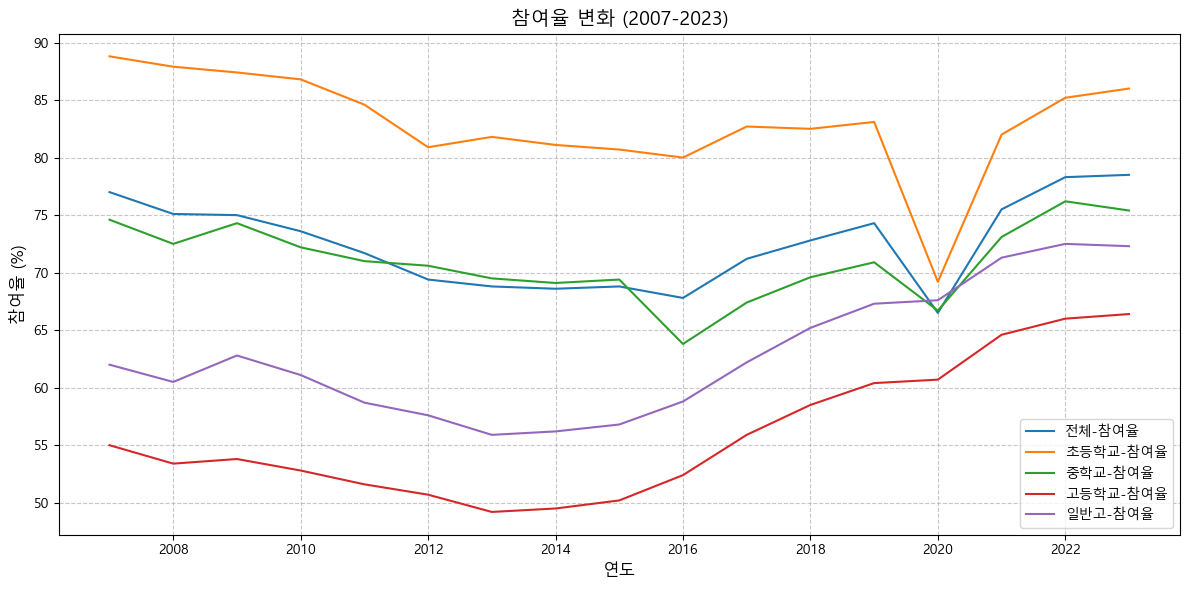

In [46]:
# 선그래프 그리기
plt.figure(figsize=(12, 6))
for column in 참여율_df.columns[1:]:  # '연도'를 제외한 나머지 열
    plt.plot(참여율_df["연도"], 참여율_df[column], label=column)

# 그래프 설정
plt.title("참여율 변화 (2007-2023)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("참여율 (%)", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()

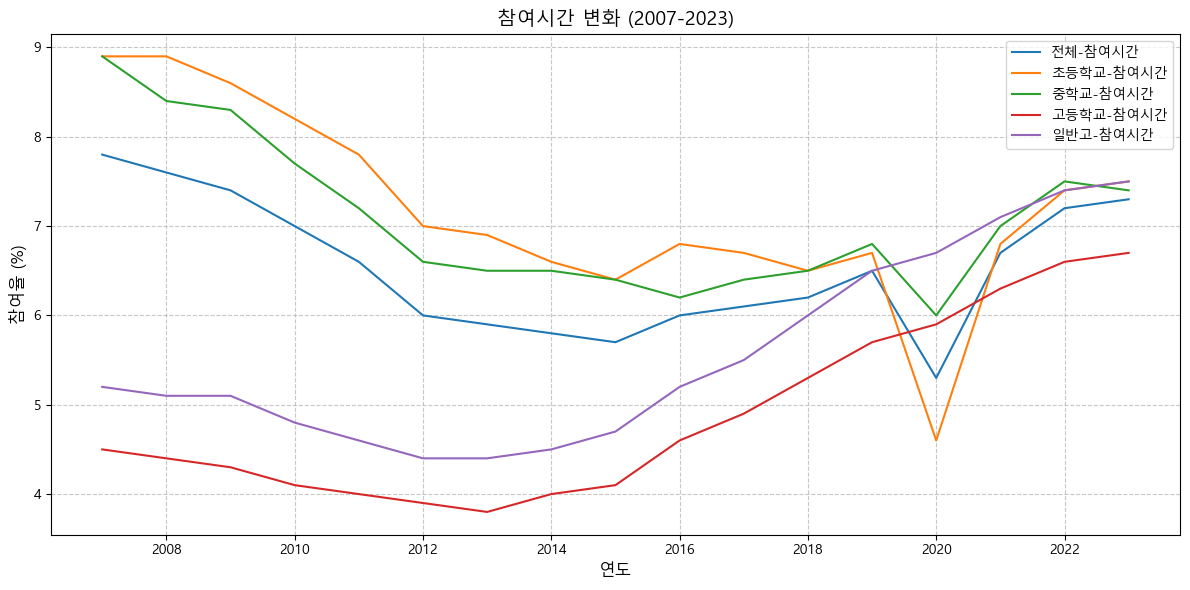

In [47]:
# 선그래프 그리기
plt.figure(figsize=(12, 6))
for column in 참여시간_df.columns[1:]:  # '연도'를 제외한 나머지 열
    plt.plot(참여시간_df["연도"], 참여시간_df[column], label=column)

# 그래프 설정
plt.title("참여시간 변화 (2007-2023)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("참여율 (%)", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()

## 과목별 사교육 참여율

In [48]:
df_p2 = pd.read_excel('4-6-2. 사교육(과목별 사교육 참여율).xlsx')

In [49]:
df_p2['Unnamed: 3'].loc[1]='국어'
df_p2['Unnamed: 4'].loc[1]='영어'
df_p2['Unnamed: 5'].loc[1]='수학'
df_p2['Unnamed: 6'].loc[1]='사회&과학'
df_p2['Unnamed: 7'].loc[1]='예체능&취미교양'

C:\Users\노준영\AppData\Local\Temp\ipykernel_5512\3434311974.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_p2['Unnamed: 3'].loc[1]='국어'
C:\Users\노준영\AppData\Local\Temp\ipykernel_5512\3434311974.py:2: FutureWarning: ChainedAssignmentErr

In [50]:
df_p2 = df_p2.drop([0,2,20])
df_p2.columns = df_p2.iloc[0]  # 0번 행을 열 이름으로 설정
df_p2 = df_p2.drop(1)
df_p2.rename(columns={'참여율': '전체'}, inplace=True)
df_p2

1,연도,전체,일반교과,국어,영어,수학,사회&과학,예체능&취미교양
3,2007,77,68.4,39.3,55.6,58.6,25.6,37
4,2008,75.1,66.4,36.1,55.6,56.5,22.8,35.3
5,2009,75,66.2,34.4,55,55.8,23.3,34.8
6,2010,73.6,64.8,31.4,52.5,53.6,20.5,33.3
7,2011,71.7,61.6,26.2,49.2,50.2,17,33.1
8,2012,69.4,58.6,22.3,46.3,47.8,14,30.9
9,2013,68.8,57.1,19.8,44,45.8,11.5,32.1
10,2014,68.6,56.4,18.8,42.9,45.3,10.8,32.6
11,2015,68.8,54.7,17.3,40.8,42.5,9.7,34.6
12,2016,67.8,51,17.7,39.1,42.3,10.4,37.8


In [51]:
df_p2.astype(int)

1,연도,전체,일반교과,국어,영어,수학,사회&과학,예체능&취미교양
3,2007,77,68,39,55,58,25,37
4,2008,75,66,36,55,56,22,35
5,2009,75,66,34,55,55,23,34
6,2010,73,64,31,52,53,20,33
7,2011,71,61,26,49,50,17,33
8,2012,69,58,22,46,47,14,30
9,2013,68,57,19,44,45,11,32
10,2014,68,56,18,42,45,10,32
11,2015,68,54,17,40,42,9,34
12,2016,67,51,17,39,42,10,37


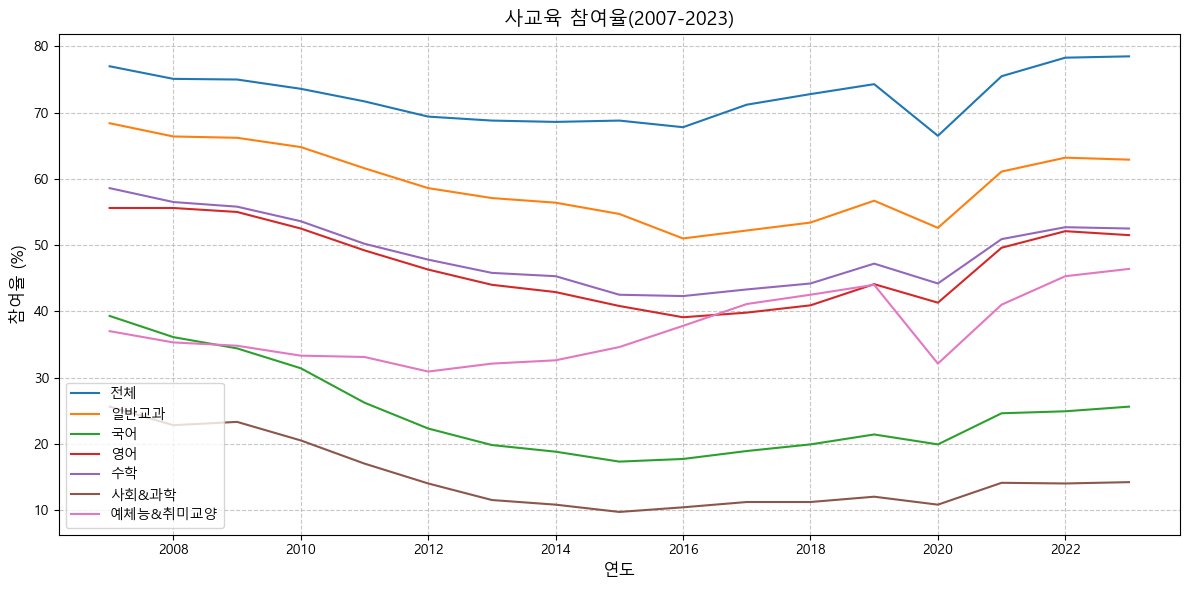

In [52]:
# 선그래프 그리기
plt.figure(figsize=(12, 6))
for column in df_p2.columns[1:]:  # '연도'를 제외한 나머지 열
    plt.plot(df_p2["연도"], df_p2[column], label=column)

# 그래프 설정
plt.title("사교육 참여율(2007-2023)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("참여율 (%)", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()